In [1]:
import pandas as pd

In [2]:
df_inat = pd.read_csv('/Users/rushilmanglik/Downloads/data_2022/occurrence.txt', delimiter='\t', quotechar='"', on_bad_lines='skip')

/var/folders/ld/8wv651js43v_m402rk1wqxl40000gn/T/ipykernel_8802/4163924877.py:1: DtypeWarning: Columns (54,62,64,65,66,68,69,72,75,82,84,90,92,93,104,105,106,108,109,110,111,114,115,116,117,118,119,122,180,181,199,208,209) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inat = pd.read_csv('/Users/rushilmanglik/Downloads/data_2022/occurrence.txt', delimiter='\t', quotechar='"', on_bad_lines='skip')


In [3]:
df_eBird = pd.read_csv('/Users/rushilmanglik/Downloads/data_2022/eBird/ebd_US-CA_202201_202212_relSep-2023.txt', sep='\t')

In [7]:
df_inat.shape

(6685891, 212)

In [8]:
df_eBird.shape

(12673675, 50)

## EDA on Bird Names. Can scientific names be used as a common key?

In [9]:
#df_inat.head(10).to_clipboard()
df_inat.head(10)

,gbifID,accessRights,bibliographicCitation,language,license,modified,publisher,references,rightsHolder,type,...,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory,eventType
0,3456783252,NaN,NaN,NaN,CC_BY_NC_4_0,2022-01-07T15:36:27Z,iNaturalist.org,https://www.inaturalist.org/observations/10438...,nature1111,NaN,...,USA,United States,USA.5_1,California,USA.5.44_1,Santa Cruz,NaN,NaN,NE,NaN
1,3499577607,NaN,NaN,NaN,CC_BY_NC_4_0,2022-02-20T18:01:00Z,iNaturalist.org,https://www.inaturalist.org/observations/10457...,alangrandiflora,NaN,...,USA,United States,USA.10_1,Florida,USA.10.44_1,Monroe,NaN,NaN,LC,NaN
2,3456408066,NaN,NaN,NaN,CC_BY_NC_4_0,2022-01-21T04:56:24Z,iNaturalist.org,https://www.inaturalist.org/observations/10500...,Jon McIntyre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC,NaN
3,4103141396,NaN,NaN,NaN,CC_BY_NC_4_0,2023-05-01T16:02:04Z,iNaturalist.org,https://www.inaturalist.org/observations/10524...,radinis,NaN,...,USA,United States,USA.10_1,Florida,USA.10.6_1,Broward,NaN,NaN,NE,NaN
4,3465925638,NaN,NaN,NaN,CC_BY_NC_4_0,2022-01-22T01:29:05Z,iNaturalist.org,https://www.inaturalist.org/observations/10530...,jhigbie,NaN,...,USA,United States,USA.5_1,California,USA.5.41_1,San Mateo,NaN,NaN,NE,NaN
5,3465912843,NaN,NaN,NaN,CC_BY_NC_4_0,2022-01-26T23:16:18Z,iNaturalist.org,https://www.inaturalist.org/observations/10544...,rwcannon57,NaN,...,USA,United States,USA.5_1,California,USA.5.19_1,Los Angeles,NaN,NaN,LC,NaN
6,3705444467,NaN,NaN,NaN,CC_BY_NC_4_0,2022-03-03T22:11:53Z,iNaturalist.org,https://www.inaturalist.org/observations/10581...,iorek,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN
7,3469046100,NaN,NaN,NaN,CC_BY_NC_4_0,2022-02-08T19:38:48Z,iNaturalist.org,https://www.inaturalist.org/observations/10634...,debogman,NaN,...,USA,United States,USA.5_1,California,USA.5.37_1,San Diego,NaN,NaN,NE,NaN
8,3468665008,NaN,NaN,NaN,CC_BY_NC_4_0,2022-02-08T23:14:05Z,iNaturalist.org,https://www.inaturalist.org/observations/10639...,avakirby,NaN,...,USA,United States,USA.38_1,Oregon,USA.38.20_1,Lane,NaN,NaN,LC,NaN
9,3469027326,NaN,NaN,NaN,CC_BY_4_0,2022-02-10T23:39:40Z,iNaturalist.org,https://www.inaturalist.org/observations/10649...,Sam Kieschnick,NaN,...,USA,United States,USA.44_1,Texas,USA.44.57_1,Dallas,NaN,NaN,LC,NaN


In [10]:
df_inat.columns

Index(['gbifID', 'accessRights', 'bibliographicCitation', 'language',
       'license', 'modified', 'publisher', 'references', 'rightsHolder',
       'type',
       ...
       'level0Gid', 'level0Name', 'level1Gid', 'level1Name', 'level2Gid',
       'level2Name', 'level3Gid', 'level3Name', 'iucnRedListCategory',
       'eventType'],
      dtype='object', length=212)

In [11]:
[x for x in df_inat.columns if ('name' in x.lower())]

['datasetName',
 'organismName',
 'scientificNameID',
 'acceptedNameUsageID',
 'parentNameUsageID',
 'originalNameUsageID',
 'nameAccordingToID',
 'namePublishedInID',
 'scientificName',
 'acceptedNameUsage',
 'parentNameUsage',
 'originalNameUsage',
 'nameAccordingTo',
 'namePublishedIn',
 'namePublishedInYear',
 'genericName',
 'vernacularName',
 'acceptedScientificName',
 'verbatimScientificName',
 'typifiedName',
 'level0Name',
 'level1Name',
 'level2Name',
 'level3Name']

In [12]:
name_columns_iNat = [
    'scientificName',
    'species',
    'acceptedScientificName',
    'verbatimScientificName'
]

In [13]:
for col in name_columns_iNat:
    print(f"Unique names in column: {col} is {df_inat[col].nunique()}")

Unique names in column: scientificName is 56843
Unique names in column: species is 48609
Unique names in column: acceptedScientificName is 55706
Unique names in column: verbatimScientificName is 58084


In [14]:
#df_eBird.head(10).to_clipboard()
df_eBird.head(10)

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
0,URN:CornellLabOfOrnithology:EBIRD:OBS1567972194,2023-04-01 23:30:47.06237,32585,issf,avibase-3C974C47,Savannah Sparrow,Passerculus sandwichensis,Savannah Sparrow (Belding's),Passerculus sandwichensis [guttatus Group],NaN,...,13.0,1,G9211526,0,1,0,NaN,"Kris birds, havocpigeon, Kobrzut, Geoff, Barb,...",NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS1396131900,2022-04-18 13:57:02.756773,2405,species,avibase-00124D98,Mourning Dove,Zenaida macroura,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS1376348464,2022-10-21 08:33:31.238436,7550,species,avibase-36B3872D,Turkey Vulture,Cathartes aura,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS1490064667,2022-08-01 15:01:53.313498,21054,species,avibase-69544B59,American Crow,Corvus brachyrhynchos,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS1352326027,2022-04-23 16:15:35.096303,26270,species,avibase-B60B1166,Ruby-crowned Kinglet,Corthylio calendula,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
5,URN:CornellLabOfOrnithology:EBIRD:OBS1540094427,2022-10-14 14:20:30.33513,7224,species,avibase-F59AB6B3,Brown Pelican,Pelecanus occidentalis,NaN,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,NaN,NaN
6,URN:CornellLabOfOrnithology:EBIRD:OBS1512520711,2022-09-05 19:54:03.365034,5732,species,avibase-BD49DB46,Black Oystercatcher,Haematopus bachmani,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
7,URN:CornellLabOfOrnithology:EBIRD:OBS1471599721,2022-07-12 13:29:17.718009,32315,species,avibase-37E9CCDA,Chipping Sparrow,Spizella passerina,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
8,URN:CornellLabOfOrnithology:EBIRD:OBS1481080453,2022-07-30 11:45:07.463489,2033,species,avibase-0C1EFC9B,Eurasian Collared-Dove,Streptopelia decaocto,NaN,NaN,N,...,1.0,1,NaN,0,1,0,NaN,NaN,Heard not seen,NaN
9,URN:CornellLabOfOrnithology:EBIRD:OBS1324444906,2022-01-22 14:50:43.062767,548,species,avibase-56CCA717,Northern Pintail,Anas acuta,NaN,NaN,NaN,...,4.0,1,G7755379,0,1,0,NaN,NaN,NaN,NaN


In [15]:
name_columns_eBird = [
    'COMMON NAME',
    'SCIENTIFIC NAME',
]

In [16]:
for col in name_columns_eBird:
    print(f"Unique names in column: {col} is {df_eBird[col].nunique()}")

Unique names in column: COMMON NAME is 891
Unique names in column: SCIENTIFIC NAME is 891


In [17]:
df_eBird.groupby(name_columns_eBird).count()

,,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
COMMON NAME,SCIENTIFIC NAME,,,,,,,,,,,,,,,,,,,,,
Abert's Towhee,Melozone aberti,2731,2731,2731,2731,2731,0,0,0,2731,28,...,2727,2731,1031,2731,2731,2731,0,425,150,0
Acanthis/Spinus sp.,Acanthis/Spinus sp.,36,36,36,36,36,0,0,0,36,0,...,36,36,14,36,36,36,0,13,5,0
Accipiter sp.,Accipiter sp.,636,636,636,636,636,0,0,0,636,2,...,635,636,294,636,636,636,0,173,140,0
Acorn Woodpecker,Melanerpes formicivorus,128100,128100,128100,128100,128100,675,675,0,128100,1093,...,127915,128100,38587,128100,128100,128100,0,27992,3613,0
African Collared-Dove,Streptopelia roseogrisea,25,25,25,25,25,22,22,25,25,1,...,25,25,9,25,25,25,0,12,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white-winged gull sp.,Larus sp. (white-winged gull sp.),49,49,49,49,49,0,0,0,49,2,...,49,49,19,49,49,49,0,16,14,0
whydah sp.,Vidua sp. (whydah sp.),2,2,2,2,2,0,0,2,2,0,...,2,2,2,2,2,2,0,2,2,0
woodpecker sp.,Picidae sp.,1909,1909,1909,1909,1909,0,0,0,1909,17,...,1905,1909,545,1909,1909,1909,0,392,515,0


In [18]:
df_eBird['TAXON CONCEPT ID'].nunique()

1108

In [20]:
df_eBird.groupby('SCIENTIFIC NAME')['TAXON CONCEPT ID'].nunique().sort_values(ascending=False)

SCIENTIFIC NAME
Junco hyemalis                     8
Zonotrichia leucophrys             7
Melospiza melodia                  7
Leiothlypis celata                 6
Loxia curvirostra                  5
                                  ..
Empidonax hammondii                1
Empidonax hammondii/oberholseri    1
Empidonax minimus                  1
Empidonax oberholseri              1
Zosterops sp.                      1
Name: TAXON CONCEPT ID, Length: 891, dtype: int64

In [21]:
df_eBird[df_eBird['SCIENTIFIC NAME'] == "Junco hyemalis"]

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
18,URN:CornellLabOfOrnithology:EBIRD:OBS1313956142,2022-01-08 17:18:24.619158,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
23,URN:CornellLabOfOrnithology:EBIRD:OBS1456185068,2022-07-09 09:01:23.548586,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,5.0,1,G8536409,0,1,0,NaN,NaN,NaN,NaN
320,URN:CornellLabOfOrnithology:EBIRD:OBS1343263672,2022-02-16 10:22:53.984301,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
504,URN:CornellLabOfOrnithology:EBIRD:OBS1584754963,2022-12-19 13:16:19.689503,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,4.0,1,G9324899,0,1,0,NaN,NaN,NaN,NaN
565,URN:CornellLabOfOrnithology:EBIRD:OBS1348910323,2022-02-21 14:58:06.223174,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673232,URN:CornellLabOfOrnithology:EBIRD:OBS1466449305,2022-06-25 11:17:32.241688,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
12673319,URN:CornellLabOfOrnithology:EBIRD:OBS1454837312,2022-06-08 21:40:17.129956,32455,issf,avibase-B1019ACB,Dark-eyed Junco,Junco hyemalis,Dark-eyed Junco (Oregon),Junco hyemalis [oreganus Group],NaN,...,2.0,1,G8528893,0,1,0,NaN,NaN,NaN,NaN
12673442,URN:CornellLabOfOrnithology:EBIRD:OBS1466221885,2022-06-24 15:23:42.921475,32455,issf,avibase-B1019ACB,Dark-eyed Junco,Junco hyemalis,Dark-eyed Junco (Oregon),Junco hyemalis [oreganus Group],NaN,...,1.0,1,NaN,0,1,0,NaN,No Rose-breasted Grosbeak during 90 minute sha...,NaN,NaN
12673473,URN:CornellLabOfOrnithology:EBIRD:OBS1569457399,2022-12-08 06:02:08.589267,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,I birded the first 30 minutes with John Harris...,NaN,NaN


In [22]:
(df_eBird.groupby('SCIENTIFIC NAME')['TAXON CONCEPT ID'].nunique() > 1).sum()

139

Observations on eBird:
- Only two name columns, 1-1 mapping between them, clearly to use Scientific Name
- There are more Taxon ID than Scientific Name!
- Some Scientific Name have more than one Taxon ID, 139 of those!
- Not the other way around at least! 

In [23]:
df_inat

,gbifID,accessRights,bibliographicCitation,language,license,modified,publisher,references,rightsHolder,type,...,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory,eventType
0,3456783252,NaN,NaN,NaN,CC_BY_NC_4_0,2022-01-07T15:36:27Z,iNaturalist.org,https://www.inaturalist.org/observations/10438...,nature1111,NaN,...,USA,United States,USA.5_1,California,USA.5.44_1,Santa Cruz,NaN,NaN,NE,NaN
1,3499577607,NaN,NaN,NaN,CC_BY_NC_4_0,2022-02-20T18:01:00Z,iNaturalist.org,https://www.inaturalist.org/observations/10457...,alangrandiflora,NaN,...,USA,United States,USA.10_1,Florida,USA.10.44_1,Monroe,NaN,NaN,LC,NaN
2,3456408066,NaN,NaN,NaN,CC_BY_NC_4_0,2022-01-21T04:56:24Z,iNaturalist.org,https://www.inaturalist.org/observations/10500...,Jon McIntyre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC,NaN
3,4103141396,NaN,NaN,NaN,CC_BY_NC_4_0,2023-05-01T16:02:04Z,iNaturalist.org,https://www.inaturalist.org/observations/10524...,radinis,NaN,...,USA,United States,USA.10_1,Florida,USA.10.6_1,Broward,NaN,NaN,NE,NaN
4,3465925638,NaN,NaN,NaN,CC_BY_NC_4_0,2022-01-22T01:29:05Z,iNaturalist.org,https://www.inaturalist.org/observations/10530...,jhigbie,NaN,...,USA,United States,USA.5_1,California,USA.5.41_1,San Mateo,NaN,NaN,NE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685886,4055032575,NaN,NaN,NaN,CC0_1_0,2023-03-07T21:19:41Z,iNaturalist.org,https://www.inaturalist.org/observations/14966...,Sequoia Janirella Wrens,NaN,...,USA,United States,USA.22_1,Massachusetts,USA.22.1_1,Barnstable,NaN,NaN,LC,NaN
6685887,4075781211,NaN,NaN,NaN,CC_BY_NC_4_0,2023-04-01T04:28:17Z,iNaturalist.org,https://www.inaturalist.org/observations/15284...,Glenn Fine,NaN,...,USA,United States,USA.5_1,California,USA.5.47_1,Siskiyou,NaN,NaN,NE,NaN
6685888,4111588709,NaN,NaN,NaN,CC_BY_NC_4_0,2023-05-03T19:13:44Z,iNaturalist.org,https://www.inaturalist.org/observations/15879...,alexandriaazcoitia,NaN,...,USA,United States,USA.10_1,Florida,USA.10.43_1,Miami-Dade,NaN,NaN,LC,NaN
6685889,4134055029,NaN,NaN,NaN,CC_BY_NC_4_0,2023-06-12T12:25:17Z,iNaturalist.org,https://www.inaturalist.org/observations/16697...,rajanrao,NaN,...,USA,United States,USA.5_1,California,USA.5.38_1,San Francisco,NaN,NaN,LC,NaN


In [24]:
df_inat['taxonID'].nunique()

58266

In [26]:
rel_columns_iNat = [
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'acceptedScientificName',
    'scientificName',
]
rel_columns_eBird = [
    'TAXON CONCEPT ID',
    'OBSERVATION COUNT',
    'COUNTRY',
    'STATE',
    'LATITUDE',
    'LONGITUDE',
    'OBSERVATION DATE',
    'SCIENTIFIC NAME',
]

In [27]:
df_iNat2 = df_inat[rel_columns_iNat].copy()
df_eBird2 = df_eBird[rel_columns_eBird].copy()

In [28]:
df_iNat2.head()

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName
0,494603.0,8542531.0,US,California,36.957957,-121.968232,2022-01-02T16:54:05,"Hermissenda opalescens (J.G.Cooper, 1863)","Hermissenda opalescens (J.G.Cooper, 1863)"
1,133315.0,2886882.0,US,Florida,24.814892,-80.820096,2022-01-08T10:36:27,Sideroxylon celastrinum (Kunth) T.D.Penn.,Sideroxylon celastrinum (Kunth) T.D.Penn.
2,144491.0,5789298.0,US,Texas,27.482563,-97.271006,2022-01-15T15:56:00,"Tringa semipalmata (J.F.Gmelin, 1789)","Tringa semipalmata (J.F.Gmelin, 1789)"
3,69223.0,2868323.0,US,Florida,26.151636,-80.141906,2022-01-15T09:03:00,Epipremnum aureum (Linden & André) G.S.Bunting,Epipremnum aureum (Linden & André) G.S.Bunting
4,49645.0,7755768.0,US,California,37.466745,-122.288341,2022-01-19T14:59:20,Pedicularis densiflora Benth.,Pedicularis densiflora Benth.


In [29]:
df_iNat2['countryCode'].value_counts()

US    6685890
Name: countryCode, dtype: int64

# eBird Analysis

In [30]:
df_eBird2['COUNTRY'].value_counts()

United States    12673675
Name: COUNTRY, dtype: int64

In [31]:
df_eBird2['STATE'].value_counts()

California    12673675
Name: STATE, dtype: int64

In [32]:
df_eBird2.head()

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME
0,avibase-3C974C47,25,United States,California,32.791629,-117.230704,2022-11-23,Passerculus sandwichensis
1,avibase-00124D98,1,United States,California,37.683447,-122.150202,2022-04-18,Zenaida macroura
2,avibase-36B3872D,1,United States,California,38.862495,-121.324445,2022-03-27,Cathartes aura
3,avibase-69544B59,10,United States,California,33.764018,-118.168695,2022-08-01,Corvus brachyrhynchos
4,avibase-B60B1166,4,United States,California,36.538833,-121.916673,2022-02-25,Corthylio calendula


In [33]:
df_eBird2['AVIBASEID'] = df_eBird2['TAXON CONCEPT ID'].apply(lambda x : x[-8:])

In [34]:
df_eBird2

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,AVIBASEID
0,avibase-3C974C47,25,United States,California,32.791629,-117.230704,2022-11-23,Passerculus sandwichensis,3C974C47
1,avibase-00124D98,1,United States,California,37.683447,-122.150202,2022-04-18,Zenaida macroura,00124D98
2,avibase-36B3872D,1,United States,California,38.862495,-121.324445,2022-03-27,Cathartes aura,36B3872D
3,avibase-69544B59,10,United States,California,33.764018,-118.168695,2022-08-01,Corvus brachyrhynchos,69544B59
4,avibase-B60B1166,4,United States,California,36.538833,-121.916673,2022-02-25,Corthylio calendula,B60B1166
...,...,...,...,...,...,...,...,...,...
12673670,avibase-715D4DDE,1,United States,California,40.101448,-122.048321,2022-01-28,Baeolophus inornatus,715D4DDE
12673671,avibase-BA4C8A02,1,United States,California,33.902497,-117.876472,2022-09-26,Geothlypis trichas,BA4C8A02
12673672,avibase-42393721,1,United States,California,32.771098,-117.102668,2022-05-20,Calypte anna,42393721
12673673,avibase-75600969,1,United States,California,41.848042,-122.702857,2022-10-25,Colaptes auratus,75600969


In [35]:
df_eBird_median_by_species = df_eBird2[df_eBird2['OBSERVATION COUNT']!='X'].groupby('AVIBASEID')['OBSERVATION COUNT'].median().to_dict()

In [36]:
df_eBird2['OBSCOUNT'] = df_eBird2[['AVIBASEID','OBSERVATION COUNT']].apply(
    lambda row: (df_eBird_median_by_species[row['AVIBASEID']] if row['AVIBASEID'] in df_eBird_median_by_species else 1) if row['OBSERVATION COUNT'] == 'X' else row['OBSERVATION COUNT'],
    axis=1
)

In [37]:
df_eBird2.shape

(12673675, 10)

In [38]:
df_eBird2['OBSCOUNT'] = df_eBird2['OBSCOUNT'].astype(float)

In [39]:
df_eBird2['OBSCOUNT'].sum()

372109242.0

In [40]:
df_eBird2['AVIBASEID'].nunique()

1108

In [41]:
df_eBird3 = df_eBird2[
    (df_eBird2['LATITUDE']>=36.4701132878)
    &
    (df_eBird2['LATITUDE']<=42.009518)
    &
    (df_eBird2['LONGITUDE']>= -124.409591)
    &
    (df_eBird2['LONGITUDE']<= -114.131211)
].copy()

In [42]:
df_eBird3.shape

(7018777, 10)

In [43]:
df_eBird3['OBSCOUNT'].sum()

318342092.5

In [44]:
df_eBird3['AVIBASEID'].nunique()

953

In [45]:
df_eBird3['observation_datetime'] = pd.to_datetime(df_eBird3['OBSERVATION DATE'])

In [46]:
df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week

/var/folders/ld/8wv651js43v_m402rk1wqxl40000gn/T/ipykernel_8802/4278245370.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week


In [47]:
df_eBird3['YEAR'] = df_eBird3['observation_datetime'].dt.year

In [48]:
df_eBird3['YEAR'].value_counts()

2022    7018777
Name: YEAR, dtype: int64

In [243]:
weekly_counts = df_eBird3['WEEK'].value_counts().reset_index()

# Rename the columns to 'Week' and 'Count'
weekly_counts.columns = ['Week', 'Count']

In [244]:
weekly_counts


,Week,Count
0,52,241061
1,50,216155
2,7,173859
3,1,168915
4,38,166402
5,6,162517
6,17,161489
7,39,159918
8,16,158161
9,19,157297


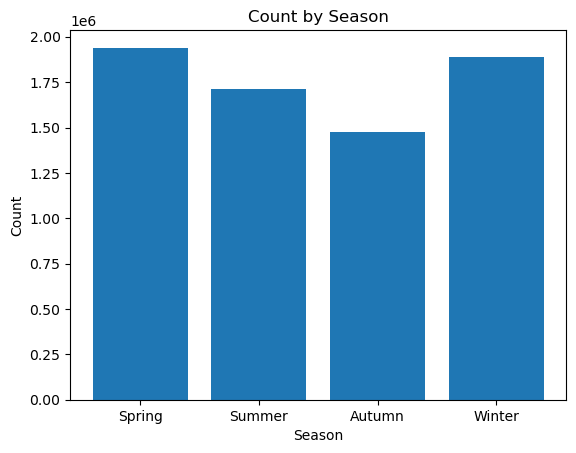

In [245]:
# Define the seasons
seasons = {
    'Spring': range(1, 14),
    'Summer': range(14, 27),
    'Autumn': range(27, 40),
    'Winter': range(40, 53)
}

# Sum the counts for each season
season_counts = {season: weekly_counts[weekly_counts['Week'].isin(weeks)]['Count'].sum() for season, weeks in seasons.items()}

# Create a bar chart
seasons = list(season_counts.keys())
counts = list(season_counts.values())

plt.bar(seasons, counts)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count by Season')
plt.show()

# iNat Analysis

In [49]:
df_inat.shape

(6685891, 212)

In [50]:
df_iNat2.shape

(6685891, 9)

In [51]:
df_iNat2.head()

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName
0,494603.0,8542531.0,US,California,36.957957,-121.968232,2022-01-02T16:54:05,"Hermissenda opalescens (J.G.Cooper, 1863)","Hermissenda opalescens (J.G.Cooper, 1863)"
1,133315.0,2886882.0,US,Florida,24.814892,-80.820096,2022-01-08T10:36:27,Sideroxylon celastrinum (Kunth) T.D.Penn.,Sideroxylon celastrinum (Kunth) T.D.Penn.
2,144491.0,5789298.0,US,Texas,27.482563,-97.271006,2022-01-15T15:56:00,"Tringa semipalmata (J.F.Gmelin, 1789)","Tringa semipalmata (J.F.Gmelin, 1789)"
3,69223.0,2868323.0,US,Florida,26.151636,-80.141906,2022-01-15T09:03:00,Epipremnum aureum (Linden & André) G.S.Bunting,Epipremnum aureum (Linden & André) G.S.Bunting
4,49645.0,7755768.0,US,California,37.466745,-122.288341,2022-01-19T14:59:20,Pedicularis densiflora Benth.,Pedicularis densiflora Benth.


In [52]:
df_iNat2['countryCode'].value_counts()

US    6685890
Name: countryCode, dtype: int64

In [53]:
df_iNat2['stateProvince'].value_counts()

California              1222097
Texas                    782676
Florida                  427183
New York                 271081
Massachusetts            203416
Ohio                     203264
Virginia                 198939
North Carolina           194619
Maryland                 190541
Pennsylvania             188987
Washington               170507
Illinois                 161705
Arizona                  158664
Oregon                   155807
New Jersey               122112
Minnesota                118636
Michigan                 114623
Colorado                 112555
Wisconsin                104188
Tennessee                103144
Georgia                  102873
Vermont                  102401
Alabama                   88400
Maine                     73033
Missouri                  72172
New Mexico                70788
Indiana                   69027
South Carolina            63162
Hawaii                    62944
Connecticut               61021
New Hampshire             60155
Kentucky

In [54]:
df_iNat2['observation_dt'] = pd.to_datetime(df_iNat2['eventDate'])

In [55]:
df_iNat3 = df_iNat2[df_iNat2['stateProvince'] == 'California'].copy()

In [56]:
df_iNat3

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt
0,494603.0,8542531.0,US,California,36.957957,-121.968232,2022-01-02T16:54:05,"Hermissenda opalescens (J.G.Cooper, 1863)","Hermissenda opalescens (J.G.Cooper, 1863)",2022-01-02 16:54:05
4,49645.0,7755768.0,US,California,37.466745,-122.288341,2022-01-19T14:59:20,Pedicularis densiflora Benth.,Pedicularis densiflora Benth.,2022-01-19 14:59:20
5,4940.0,2480873.0,US,California,34.141762,-118.053457,2022-01-22T12:23:00,"Egretta thula (Molina, 1782)","Egretta thula (Molina, 1782)",2022-01-22 12:23:00
6,51799.0,2259665.0,US,California,37.520047,-122.516128,2022-01-29T14:29:04,"Balanophyllia elegans Verrill, 1864","Balanophyllia elegans Verrill, 1864",2022-01-29 14:29:04
7,53269.0,3105782.0,US,California,32.905906,-117.074158,2022-02-07T16:36:49,Sonchus asper (L.) Hill,Sonchus asper (L.) Hill,2022-02-07 16:36:49
...,...,...,...,...,...,...,...,...,...,...
6685877,56810.0,6893238.0,US,California,34.043602,-116.944841,2022-12-19T13:29:00,"Paruroctonus silvestrii (Borelli, 1909)","Paruroctonus silvestrii (Borelli, 1909)",2022-12-19 13:29:00
6685879,4940.0,2480873.0,US,California,36.962782,-122.002811,2022-12-23T14:27:00,"Egretta thula (Molina, 1782)","Egretta thula (Molina, 1782)",2022-12-23 14:27:00
6685883,52628.0,2160133.0,US,California,37.736142,-122.4197,2022-12-06T10:47:33,"Araneus diadematus Clerck, 1757","Araneus diadematus Clerck, 1757",2022-12-06 10:47:33
6685887,320398.0,4989914.0,US,California,41.378773,-122.432864,2022-05-06T00:00:00,"Myzia interrupta (Casey, 1899)","Myzia interrupta (Casey, 1899)",2022-05-06 00:00:00


In [57]:
df_iNat3['decimalLatitude'] = df_iNat3['decimalLatitude'].astype(float)

In [58]:
df_iNat3['decimalLongitude'] = df_iNat3['decimalLongitude'].astype(float)

In [59]:
df_iNat4 = df_iNat3[
    (df_iNat3['decimalLatitude']>=36.4701132878)
    &
    (df_iNat3['decimalLatitude']<=42.009518)
    &
    (df_iNat3['decimalLongitude']>= -124.409591)
    &
    (df_iNat3['decimalLongitude']<= -114.131211)
].copy()

In [60]:
df_iNat4.shape

(658274, 10)

In [61]:
df_iNat4['YEAR'] = df_iNat4['observation_dt'].dt.year
df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week

/var/folders/ld/8wv651js43v_m402rk1wqxl40000gn/T/ipykernel_8802/2813681667.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week


In [62]:
df_iNat4['YEAR'].value_counts()

2022    658274
Name: YEAR, dtype: int64

In [246]:
weekly_counts1 = df_iNat4['WEEK'].value_counts().reset_index()

# Rename the columns to 'Week' and 'Count'
weekly_counts1.columns = ['Week', 'Count']

In [247]:
weekly_counts1

,Week,Count
0,17,27838
1,18,19651
2,20,18444
3,13,18209
4,12,17854
5,24,17590
6,16,17503
7,14,17474
8,21,16446
9,22,15650


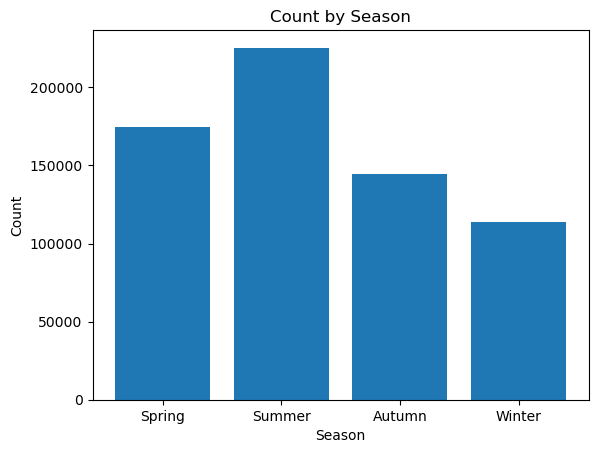

In [248]:
# Define the seasons
seasons = {
    'Spring': range(1, 14),
    'Summer': range(14, 27),
    'Autumn': range(27, 40),
    'Winter': range(40, 53)
}

# Sum the counts for each season
season_counts = {season: weekly_counts1[weekly_counts1['Week'].isin(weeks)]['Count'].sum() for season, weeks in seasons.items()}

# Create a bar chart
seasons = list(season_counts.keys())
counts = list(season_counts.values())

plt.bar(seasons, counts)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count by Season')
plt.show()

In [63]:
df_iNat4['taxonID'].nunique()

12273

# Merging iNat and eBird

In [64]:
df_tax_key = pd.read_csv('/Users/rushilmanglik/Downloads/data_2022/query_taxonIDs_various.csv')

/var/folders/ld/8wv651js43v_m402rk1wqxl40000gn/T/ipykernel_8802/135729888.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tax_key = pd.read_csv('/Users/rushilmanglik/Downloads/data_2022/query_taxonIDs_various.csv')


In [65]:
df_tax_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830987 entries, 0 to 830986
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item       830987 non-null  object 
 1   iNat_Tid   830987 non-null  object 
 2   ITIS_TSN   314392 non-null  float64
 3   GBF_ID     809035 non-null  float64
 4   avibaseid  8795 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.7+ MB


# Adding avibase-id to iNat

In [66]:
df_tax_key_fil = df_tax_key[~df_tax_key['avibaseid'].isna()]

In [67]:
df_tax_key_fil = df_tax_key_fil[df_tax_key_fil['iNat_Tid']!='Frank'].copy()

In [68]:
df_tax_key_fil['iNat_Tid_num']= df_tax_key_fil['iNat_Tid'].astype(float)

In [69]:
df_tax_key_fil

,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num
8,http://www.wikidata.org/entity/Q855024,2244,554655.0,2475439.0,302385236F22586B,2244.0
10,http://www.wikidata.org/entity/Q25388,204556,561707.0,2488949.0,EBDD410629FE11AC,204556.0
19,http://www.wikidata.org/entity/Q1094736,3352,676921.0,2495757.0,F6C3F6DB6EE1478B,3352.0
23,http://www.wikidata.org/entity/Q961967,2021,553828.0,2482140.0,69BBDE320D31CA7A,2021.0
24,http://www.wikidata.org/entity/Q494983,26,176186.0,2474943.0,38F36091DBC85095,26.0
...,...,...,...,...,...,...
823400,http://www.wikidata.org/entity/Q55112126,1286936,NaN,7626227.0,3C6A0512,1286936.0
824753,http://www.wikidata.org/entity/Q971542,792908,554011.0,2478391.0,33F13BB178A3EB73,792908.0
827782,http://www.wikidata.org/entity/Q27617614,718627,918391.0,6541423.0,0CC1FD4A59962145,718627.0
829307,http://www.wikidata.org/entity/Q28065684,979640,NaN,10658506.0,3FC8CA50CC50BAAD,979640.0


In [70]:
merge_process1 = df_iNat4.merge(right=df_tax_key_fil, how='left', left_on='taxonID', right_on='iNat_Tid_num')

In [71]:
merge_process2 = [x[0:8] for x in merge_process1['avibaseid'].dropna().values]

In [72]:
merge_process3 = list(set(merge_process2))

In [73]:
merge_process3

['B5CE8FAD',
 '0EB07C12',
 '3AC46C54',
 '1181E297',
 '6FB34E54',
 '4D08EE7E',
 '28A4DA76',
 'CB343E43',
 '8DB64266',
 '4BB4F257',
 'EA4D6C0B',
 '53D94597',
 'C757BD95',
 '3A3C62BC',
 '42101632',
 '049D9AEA',
 'D13B9122',
 'BCBD2EAE',
 '3EF081A8',
 '4F28673C',
 '60214D49',
 '3F9E1C51',
 '4E74AE22',
 '0CF12F81',
 '87705CC4',
 'BD929CBC',
 'F845062F',
 'E196D6F9',
 '787E0536',
 'D05FFEF7',
 'FF592882',
 '1044B438',
 '6BDADC9C',
 'AF49F890',
 '78509A5D',
 '7E65A952',
 '46B54DB1',
 '1725B07D',
 '12E354E2',
 'EB98812F',
 '85625D75',
 '27903EF7',
 'D204A930',
 'BA9191BC',
 '62DAF6CC',
 'A59FA446',
 '75600969',
 '4E192262',
 '3558066B',
 'BD49DB46',
 '9B26D30B',
 '2CF6D6F6',
 '5F8E7CA8',
 '90E2543E',
 '145F1116',
 'A0F29F1E',
 '2C7A2673',
 '12D5BA6C',
 '76DF73A9',
 '58312873',
 '5816834E',
 'F6CA75F0',
 'B01E8BD4',
 '3072CC16',
 'D621FFC6',
 '110CF425',
 'B59E1863',
 '866903B9',
 'F6C6C3F7',
 'F35821AA',
 '544A5E6B',
 'E1714A09',
 '2CC21529',
 '115AF02D',
 '5F77FED5',
 '7E022378',
 'EB0CD5DC',

In [74]:
len(merge_process3)

428

In [75]:
len(merge_process3)

428

In [76]:
df_eBird3

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,AVIBASEID,OBSCOUNT,observation_datetime,WEEK,YEAR
1,avibase-00124D98,1,United States,California,37.683447,-122.150202,2022-04-18,Zenaida macroura,00124D98,1.0,2022-04-18,16,2022
2,avibase-36B3872D,1,United States,California,38.862495,-121.324445,2022-03-27,Cathartes aura,36B3872D,1.0,2022-03-27,12,2022
4,avibase-B60B1166,4,United States,California,36.538833,-121.916673,2022-02-25,Corthylio calendula,B60B1166,4.0,2022-02-25,8,2022
5,avibase-F59AB6B3,17,United States,California,39.550658,-123.765380,2022-10-12,Pelecanus occidentalis,F59AB6B3,17.0,2022-10-12,41,2022
7,avibase-37E9CCDA,3,United States,California,41.049866,-120.778693,2022-07-02,Spizella passerina,37E9CCDA,3.0,2022-07-02,26,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673664,avibase-FB738385,21,United States,California,39.458208,-123.807747,2022-03-07,Bucephala albeola,FB738385,21.0,2022-03-07,10,2022
12673667,avibase-4FB248BA,34,United States,California,38.119061,-122.952247,2022-12-17,Fulica americana,4FB248BA,34.0,2022-12-17,50,2022
12673669,avibase-6EB81C98,4,United States,California,38.027411,-122.515583,2022-10-31,Tringa melanoleuca,6EB81C98,4.0,2022-10-31,44,2022
12673670,avibase-715D4DDE,1,United States,California,40.101448,-122.048321,2022-01-28,Baeolophus inornatus,715D4DDE,1.0,2022-01-28,4,2022


In [77]:
final_list_birds = [x for x in df_eBird3['AVIBASEID'] if x in merge_process3]

In [78]:
final_list_birds2_l = list(set(final_list_birds))
final_list_birds2_s = set(final_list_birds)

In [79]:
len(final_list_birds2_l)

387

# Filtering only the relevant birds

In [80]:
df_eBird4 = df_eBird3[df_eBird3['AVIBASEID'].isin(final_list_birds2_s)]

In [81]:
df_eBird4.shape

(5228172, 13)

In [82]:
df_eBird4['OBSCOUNT'].sum()

283901629.0

In [83]:
df_eBird4['AVIBASEID'].nunique()

387

In [84]:
df_eBird4

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,AVIBASEID,OBSCOUNT,observation_datetime,WEEK,YEAR
1,avibase-00124D98,1,United States,California,37.683447,-122.150202,2022-04-18,Zenaida macroura,00124D98,1.0,2022-04-18,16,2022
2,avibase-36B3872D,1,United States,California,38.862495,-121.324445,2022-03-27,Cathartes aura,36B3872D,1.0,2022-03-27,12,2022
5,avibase-F59AB6B3,17,United States,California,39.550658,-123.765380,2022-10-12,Pelecanus occidentalis,F59AB6B3,17.0,2022-10-12,41,2022
7,avibase-37E9CCDA,3,United States,California,41.049866,-120.778693,2022-07-02,Spizella passerina,37E9CCDA,3.0,2022-07-02,26,2022
9,avibase-56CCA717,5,United States,California,38.267837,-121.437927,2022-01-22,Anas acuta,56CCA717,5.0,2022-01-22,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673661,avibase-68EA281A,11,United States,California,38.119061,-122.952247,2022-11-20,Bucephala clangula,68EA281A,11.0,2022-11-20,46,2022
12673662,avibase-151C2B3F,3,United States,California,36.995819,-121.806914,2022-02-06,Aphelocoma californica,151C2B3F,3.0,2022-02-06,5,2022
12673664,avibase-FB738385,21,United States,California,39.458208,-123.807747,2022-03-07,Bucephala albeola,FB738385,21.0,2022-03-07,10,2022
12673669,avibase-6EB81C98,4,United States,California,38.027411,-122.515583,2022-10-31,Tringa melanoleuca,6EB81C98,4.0,2022-10-31,44,2022


In [85]:
df_iNat4

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,YEAR,WEEK
0,494603.0,8542531.0,US,California,36.957957,-121.968232,2022-01-02T16:54:05,"Hermissenda opalescens (J.G.Cooper, 1863)","Hermissenda opalescens (J.G.Cooper, 1863)",2022-01-02 16:54:05,2022,52
4,49645.0,7755768.0,US,California,37.466745,-122.288341,2022-01-19T14:59:20,Pedicularis densiflora Benth.,Pedicularis densiflora Benth.,2022-01-19 14:59:20,2022,3
6,51799.0,2259665.0,US,California,37.520047,-122.516128,2022-01-29T14:29:04,"Balanophyllia elegans Verrill, 1864","Balanophyllia elegans Verrill, 1864",2022-01-29 14:29:04,2022,4
11,339052.0,6452738.0,US,California,37.520231,-122.516419,2022-02-15T15:46:00,Neogastroclonium subarticulatum,Neogastroclonium subarticulatum,2022-02-15 15:46:00,2022,7
15,53419.0,2988485.0,US,California,37.530912,-122.352570,2022-02-25T12:19:05,Oemleria cerasiformis (Torr. & A.Gray ex Hook....,Oemleria cerasiformis (Torr. & A.Gray ex Hook....,2022-02-25 12:19:05,2022,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6685874,9981.0,5231142.0,US,California,39.734935,-121.796230,2022-10-30T16:23:20,"Passerculus sandwichensis (J.F.Gmelin, 1789)","Passerculus sandwichensis (J.F.Gmelin, 1789)",2022-10-30 16:23:20,2022,43
6685879,4940.0,2480873.0,US,California,36.962782,-122.002811,2022-12-23T14:27:00,"Egretta thula (Molina, 1782)","Egretta thula (Molina, 1782)",2022-12-23 14:27:00,2022,51
6685883,52628.0,2160133.0,US,California,37.736142,-122.419700,2022-12-06T10:47:33,"Araneus diadematus Clerck, 1757","Araneus diadematus Clerck, 1757",2022-12-06 10:47:33,2022,49
6685887,320398.0,4989914.0,US,California,41.378773,-122.432864,2022-05-06T00:00:00,"Myzia interrupta (Casey, 1899)","Myzia interrupta (Casey, 1899)",2022-05-06 00:00:00,2022,18


In [86]:
df_iNat4

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,YEAR,WEEK
0,494603.0,8542531.0,US,California,36.957957,-121.968232,2022-01-02T16:54:05,"Hermissenda opalescens (J.G.Cooper, 1863)","Hermissenda opalescens (J.G.Cooper, 1863)",2022-01-02 16:54:05,2022,52
4,49645.0,7755768.0,US,California,37.466745,-122.288341,2022-01-19T14:59:20,Pedicularis densiflora Benth.,Pedicularis densiflora Benth.,2022-01-19 14:59:20,2022,3
6,51799.0,2259665.0,US,California,37.520047,-122.516128,2022-01-29T14:29:04,"Balanophyllia elegans Verrill, 1864","Balanophyllia elegans Verrill, 1864",2022-01-29 14:29:04,2022,4
11,339052.0,6452738.0,US,California,37.520231,-122.516419,2022-02-15T15:46:00,Neogastroclonium subarticulatum,Neogastroclonium subarticulatum,2022-02-15 15:46:00,2022,7
15,53419.0,2988485.0,US,California,37.530912,-122.352570,2022-02-25T12:19:05,Oemleria cerasiformis (Torr. & A.Gray ex Hook....,Oemleria cerasiformis (Torr. & A.Gray ex Hook....,2022-02-25 12:19:05,2022,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6685874,9981.0,5231142.0,US,California,39.734935,-121.796230,2022-10-30T16:23:20,"Passerculus sandwichensis (J.F.Gmelin, 1789)","Passerculus sandwichensis (J.F.Gmelin, 1789)",2022-10-30 16:23:20,2022,43
6685879,4940.0,2480873.0,US,California,36.962782,-122.002811,2022-12-23T14:27:00,"Egretta thula (Molina, 1782)","Egretta thula (Molina, 1782)",2022-12-23 14:27:00,2022,51
6685883,52628.0,2160133.0,US,California,37.736142,-122.419700,2022-12-06T10:47:33,"Araneus diadematus Clerck, 1757","Araneus diadematus Clerck, 1757",2022-12-06 10:47:33,2022,49
6685887,320398.0,4989914.0,US,California,41.378773,-122.432864,2022-05-06T00:00:00,"Myzia interrupta (Casey, 1899)","Myzia interrupta (Casey, 1899)",2022-05-06 00:00:00,2022,18


In [87]:
merge_process1.shape

(660024, 18)

In [88]:
df_iNat5 = merge_process1[~(merge_process1['avibaseid'].isna())].copy()

In [89]:
df_iNat5['AVIBASEID'] = df_iNat5['avibaseid'].apply(lambda x: x[0:8])

In [90]:
df_iNat6 = df_iNat5.drop_duplicates().copy()

In [91]:
df_iNat6

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,YEAR,WEEK,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num,AVIBASEID
5,506118.0,2482414.0,US,California,38.567372,-122.684866,2022-03-01T09:36:00,"Aphelocoma californica (Vigors, 1839)","Aphelocoma californica (Vigors, 1839)",2022-03-01 09:36:00,2022,9,http://www.wikidata.org/entity/Q848772,506118,554128.0,2482414.0,151C2B3F0AB3B30F,506118.0,151C2B3F
14,4940.0,2480873.0,US,California,37.426663,-121.979127,2022-05-02T16:57:00,"Egretta thula (Molina, 1782)","Egretta thula (Molina, 1782)",2022-05-02 16:57:00,2022,18,http://www.wikidata.org/entity/Q59785,4940,174813.0,2480873.0,AA7901D88E7203E5,4940.0,AA7901D8
15,3959.0,5739290.0,US,California,37.434894,-122.098629,2022-05-06T17:12:00,"Phalaropus lobatus (Linnaeus, 1758)","Phalaropus lobatus (Linnaeus, 1758)",2022-05-06 17:12:00,2022,18,http://www.wikidata.org/entity/Q206840,3959,176735.0,5739290.0,E6F3BA54577746FB,3959.0,E6F3BA54
20,4328.0,5229158.0,US,California,38.418267,-123.103502,2022-07-30T13:26:00,"Pelecanus occidentalis Linnaeus, 1766","Pelecanus occidentalis Linnaeus, 1766",2022-07-30 13:26:00,2022,30,http://www.wikidata.org/entity/Q208714,4328,174685.0,5229158.0,F59AB6B357BF97D8,4328.0,F59AB6B3
21,4385.0,2481146.0,US,California,37.497929,-122.495813,2022-07-30T18:01:50,"Larus californicus Lawrence, 1854","Larus californicus Lawrence, 1854",2022-07-30 18:01:50,2022,30,http://www.wikidata.org/entity/Q953999,4385,176829.0,2481146.0,7FCE8A431E5E5ECB,4385.0,7FCE8A43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660008,12878.0,2490821.0,US,California,36.540914,-121.891748,2022-07-04T14:15:00,"Catharus ustulatus (Nuttall, 1840)","Catharus ustulatus (Nuttall, 1840)",2022-07-04 14:15:00,2022,27,http://www.wikidata.org/entity/Q545006,12878,179788.0,2490821.0,E53FC25C090A6AD8,12878.0,E53FC25C
660011,5305.0,2480446.0,US,California,37.238375,-121.869178,2022-08-11T07:25:00,"Haliaeetus leucocephalus (Linnaeus, 1766)","Haliaeetus leucocephalus (Linnaeus, 1766)",2022-08-11 07:25:00,2022,32,http://www.wikidata.org/entity/Q127216,5305,175420.0,2480446.0,FED3756C12CF67FA,5305.0,FED3756C
660019,9981.0,5231142.0,US,California,39.734935,-121.796230,2022-10-30T16:23:20,"Passerculus sandwichensis (J.F.Gmelin, 1789)","Passerculus sandwichensis (J.F.Gmelin, 1789)",2022-10-30 16:23:20,2022,43,http://www.wikidata.org/entity/Q287893,9981,179314.0,5231142.0,31CE00C71528322F,9981.0,31CE00C7
660020,4940.0,2480873.0,US,California,36.962782,-122.002811,2022-12-23T14:27:00,"Egretta thula (Molina, 1782)","Egretta thula (Molina, 1782)",2022-12-23 14:27:00,2022,51,http://www.wikidata.org/entity/Q59785,4940,174813.0,2480873.0,AA7901D88E7203E5,4940.0,AA7901D8


In [92]:
df_iNat7 = df_iNat6[df_iNat6['AVIBASEID'].isin(final_list_birds2_s)]

In [93]:
df_iNat7.shape

(140807, 19)

In [94]:
df_iNat7['AVIBASEID'].nunique()

387

In [95]:
df_iNat7['AVIBASEID'].nunique()

387

In [96]:
df_eBird4['AVIBASEID'].nunique()

387

In [97]:
df_eBird4

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,AVIBASEID,OBSCOUNT,observation_datetime,WEEK,YEAR
1,avibase-00124D98,1,United States,California,37.683447,-122.150202,2022-04-18,Zenaida macroura,00124D98,1.0,2022-04-18,16,2022
2,avibase-36B3872D,1,United States,California,38.862495,-121.324445,2022-03-27,Cathartes aura,36B3872D,1.0,2022-03-27,12,2022
5,avibase-F59AB6B3,17,United States,California,39.550658,-123.765380,2022-10-12,Pelecanus occidentalis,F59AB6B3,17.0,2022-10-12,41,2022
7,avibase-37E9CCDA,3,United States,California,41.049866,-120.778693,2022-07-02,Spizella passerina,37E9CCDA,3.0,2022-07-02,26,2022
9,avibase-56CCA717,5,United States,California,38.267837,-121.437927,2022-01-22,Anas acuta,56CCA717,5.0,2022-01-22,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673661,avibase-68EA281A,11,United States,California,38.119061,-122.952247,2022-11-20,Bucephala clangula,68EA281A,11.0,2022-11-20,46,2022
12673662,avibase-151C2B3F,3,United States,California,36.995819,-121.806914,2022-02-06,Aphelocoma californica,151C2B3F,3.0,2022-02-06,5,2022
12673664,avibase-FB738385,21,United States,California,39.458208,-123.807747,2022-03-07,Bucephala albeola,FB738385,21.0,2022-03-07,10,2022
12673669,avibase-6EB81C98,4,United States,California,38.027411,-122.515583,2022-10-31,Tringa melanoleuca,6EB81C98,4.0,2022-10-31,44,2022


In [98]:
df_iNat7[df_iNat7['AVIBASEID']== 'BC5A9498']

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,YEAR,WEEK,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num,AVIBASEID
161,145245.0,7341805.0,US,California,37.921303,-122.043728,2022-12-22T14:21:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-12-22 14:21:00,2022,51,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
409,145245.0,7341805.0,US,California,38.588009,-121.332722,2022-11-04T16:50:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-11-04 16:50:00,2022,44,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
1359,145245.0,7341805.0,US,California,36.617772,-121.941468,2022-11-15T14:40:46,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-11-15 14:40:46,2022,46,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
2157,145245.0,7341805.0,US,California,38.552178,-121.620141,2022-02-24T16:18:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-02-24 16:18:00,2022,8,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
2295,145245.0,7341805.0,US,California,37.333775,-121.921718,2022-10-09T17:33:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-10-09 17:33:00,2022,40,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656977,145245.0,7341805.0,US,California,37.296169,-121.820983,2022-11-04T10:54:51,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-11-04 10:54:51,2022,44,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
658701,145245.0,7341805.0,US,California,37.770524,-122.462702,2022-04-10T09:15:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-04-10 09:15:00,2022,14,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
658730,145245.0,7341805.0,US,California,37.544986,-121.941406,2022-03-06T17:35:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-03-06 17:35:00,2022,9,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
659295,145245.0,7341805.0,US,California,37.329111,-122.196288,2022-11-18T09:48:40,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2022-11-18 09:48:40,2022,46,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498


# Adding Bird Name

In [99]:
name_birds = df_eBird[['TAXON CONCEPT ID', 'COMMON NAME']]

In [100]:
name_birds2 = name_birds.drop_duplicates().copy()

In [101]:
name_birds2.shape

(1108, 2)

In [102]:
name_birds2['AVIBASEID'] = name_birds2['TAXON CONCEPT ID'].apply(lambda x: x[-8:])

In [103]:
name_birds2

,TAXON CONCEPT ID,COMMON NAME,AVIBASEID
0,avibase-3C974C47,Savannah Sparrow,3C974C47
1,avibase-00124D98,Mourning Dove,00124D98
2,avibase-36B3872D,Turkey Vulture,36B3872D
3,avibase-69544B59,American Crow,69544B59
4,avibase-B60B1166,Ruby-crowned Kinglet,B60B1166
...,...,...,...
11565388,avibase-D9BAB142,Eclectus Parrot,D9BAB142
11763133,avibase-0C6E6012,White Wagtail,0C6E6012
12182202,avibase-CBFF9185,Canvasback x Redhead (hybrid),CBFF9185
12308202,avibase-1E6F0F8D,Emperor Goose,1E6F0F8D


In [104]:
df_eBird5 = df_eBird4.merge(name_birds2, how='left', on='AVIBASEID')

In [105]:
df_eBird5.shape

(5228172, 15)

In [106]:
df_eBird4.shape

(5228172, 13)

In [107]:
df_iNat7.shape

(140807, 19)

In [108]:
df_iNat8 = df_iNat7.merge(name_birds2, how='left', on='AVIBASEID')

In [109]:
df_iNat8

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,...,WEEK,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num,AVIBASEID,TAXON CONCEPT ID,COMMON NAME
0,506118.0,2482414.0,US,California,38.567372,-122.684866,2022-03-01T09:36:00,"Aphelocoma californica (Vigors, 1839)","Aphelocoma californica (Vigors, 1839)",2022-03-01 09:36:00,...,9,http://www.wikidata.org/entity/Q848772,506118,554128.0,2482414.0,151C2B3F0AB3B30F,506118.0,151C2B3F,avibase-151C2B3F,California Scrub-Jay
1,4940.0,2480873.0,US,California,37.426663,-121.979127,2022-05-02T16:57:00,"Egretta thula (Molina, 1782)","Egretta thula (Molina, 1782)",2022-05-02 16:57:00,...,18,http://www.wikidata.org/entity/Q59785,4940,174813.0,2480873.0,AA7901D88E7203E5,4940.0,AA7901D8,avibase-AA7901D8,Snowy Egret
2,3959.0,5739290.0,US,California,37.434894,-122.098629,2022-05-06T17:12:00,"Phalaropus lobatus (Linnaeus, 1758)","Phalaropus lobatus (Linnaeus, 1758)",2022-05-06 17:12:00,...,18,http://www.wikidata.org/entity/Q206840,3959,176735.0,5739290.0,E6F3BA54577746FB,3959.0,E6F3BA54,avibase-E6F3BA54,Red-necked Phalarope
3,4328.0,5229158.0,US,California,38.418267,-123.103502,2022-07-30T13:26:00,"Pelecanus occidentalis Linnaeus, 1766","Pelecanus occidentalis Linnaeus, 1766",2022-07-30 13:26:00,...,30,http://www.wikidata.org/entity/Q208714,4328,174685.0,5229158.0,F59AB6B357BF97D8,4328.0,F59AB6B3,avibase-F59AB6B3,Brown Pelican
4,4385.0,2481146.0,US,California,37.497929,-122.495813,2022-07-30T18:01:50,"Larus californicus Lawrence, 1854","Larus californicus Lawrence, 1854",2022-07-30 18:01:50,...,30,http://www.wikidata.org/entity/Q953999,4385,176829.0,2481146.0,7FCE8A431E5E5ECB,4385.0,7FCE8A43,avibase-7FCE8A43,California Gull
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140802,12878.0,2490821.0,US,California,36.540914,-121.891748,2022-07-04T14:15:00,"Catharus ustulatus (Nuttall, 1840)","Catharus ustulatus (Nuttall, 1840)",2022-07-04 14:15:00,...,27,http://www.wikidata.org/entity/Q545006,12878,179788.0,2490821.0,E53FC25C090A6AD8,12878.0,E53FC25C,avibase-E53FC25C,Swainson's Thrush
140803,5305.0,2480446.0,US,California,37.238375,-121.869178,2022-08-11T07:25:00,"Haliaeetus leucocephalus (Linnaeus, 1766)","Haliaeetus leucocephalus (Linnaeus, 1766)",2022-08-11 07:25:00,...,32,http://www.wikidata.org/entity/Q127216,5305,175420.0,2480446.0,FED3756C12CF67FA,5305.0,FED3756C,avibase-FED3756C,Bald Eagle
140804,9981.0,5231142.0,US,California,39.734935,-121.796230,2022-10-30T16:23:20,"Passerculus sandwichensis (J.F.Gmelin, 1789)","Passerculus sandwichensis (J.F.Gmelin, 1789)",2022-10-30 16:23:20,...,43,http://www.wikidata.org/entity/Q287893,9981,179314.0,5231142.0,31CE00C71528322F,9981.0,31CE00C7,avibase-31CE00C7,Savannah Sparrow
140805,4940.0,2480873.0,US,California,36.962782,-122.002811,2022-12-23T14:27:00,"Egretta thula (Molina, 1782)","Egretta thula (Molina, 1782)",2022-12-23 14:27:00,...,51,http://www.wikidata.org/entity/Q59785,4940,174813.0,2480873.0,AA7901D88E7203E5,4940.0,AA7901D8,avibase-AA7901D8,Snowy Egret


In [110]:
df_eBird5['AVIBASEID'].nunique()

387

In [111]:
df_iNat8['AVIBASEID'].nunique()

387

In [112]:
eBird_avibaseid_counts = df_eBird5.groupby(['AVIBASEID']).count()['STATE'].to_dict()

In [113]:
iNat_avibaseid_counts = df_iNat8.groupby("AVIBASEID").count()['stateProvince'].to_dict()

In [114]:
eBird_weekly_counts = df_eBird5.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()

In [115]:
eBird_weekly_counts2 = eBird_weekly_counts[['AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTRY']].copy()

In [116]:
eBird_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTRY
0,000482C9,Orchard Oriole,22,7
1,000482C9,Orchard Oriole,35,5
2,000482C9,Orchard Oriole,37,16
3,000482C9,Orchard Oriole,38,28
4,000482C9,Orchard Oriole,39,44
...,...,...,...,...
14298,FFF61080,Orange-crowned Warbler,48,173
14299,FFF61080,Orange-crowned Warbler,49,154
14300,FFF61080,Orange-crowned Warbler,50,332
14301,FFF61080,Orange-crowned Warbler,51,167


In [117]:
eBird_weekly_counts2.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]

In [118]:
eBird_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS
0,000482C9,Orchard Oriole,22,7
1,000482C9,Orchard Oriole,35,5
2,000482C9,Orchard Oriole,37,16
3,000482C9,Orchard Oriole,38,28
4,000482C9,Orchard Oriole,39,44
...,...,...,...,...
14298,FFF61080,Orange-crowned Warbler,48,173
14299,FFF61080,Orange-crowned Warbler,49,154
14300,FFF61080,Orange-crowned Warbler,50,332
14301,FFF61080,Orange-crowned Warbler,51,167


In [119]:
eBird_weekly_counts2['REL_COUNTS'] = eBird_weekly_counts2.apply(
    lambda row: row['COUNTS']/ eBird_avibaseid_counts[row['AVIBASEID']],
    axis=1
).copy()

In [120]:
eBird_weekly_counts2['REL_COUNTS'].sum()

387.0

In [121]:
iNat_weekly_counts = df_iNat8.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()

In [122]:
iNat_weekly_counts2 = iNat_weekly_counts[['AVIBASEID', 'COMMON NAME', 'WEEK', 'countryCode']].copy()

In [123]:
iNat_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,countryCode
0,000482C9,Orchard Oriole,37,1
1,000482C9,Orchard Oriole,46,1
2,000482C9,Orchard Oriole,51,1
3,00124D98,Mourning Dove,1,25
4,00124D98,Mourning Dove,2,28
...,...,...,...,...
10173,FFF61080,Orange-crowned Warbler,48,6
10174,FFF61080,Orange-crowned Warbler,49,4
10175,FFF61080,Orange-crowned Warbler,50,6
10176,FFF61080,Orange-crowned Warbler,51,7


In [124]:
iNat_weekly_counts2.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]

In [125]:
iNat_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS
0,000482C9,Orchard Oriole,37,1
1,000482C9,Orchard Oriole,46,1
2,000482C9,Orchard Oriole,51,1
3,00124D98,Mourning Dove,1,25
4,00124D98,Mourning Dove,2,28
...,...,...,...,...
10173,FFF61080,Orange-crowned Warbler,48,6
10174,FFF61080,Orange-crowned Warbler,49,4
10175,FFF61080,Orange-crowned Warbler,50,6
10176,FFF61080,Orange-crowned Warbler,51,7


In [126]:
iNat_weekly_counts2['REL_COUNTS'] = iNat_weekly_counts2.apply(
    lambda row: row['COUNTS']/ iNat_avibaseid_counts[row['AVIBASEID']],
    axis=1
).copy()

In [127]:
iNat_weekly_counts2['REL_COUNTS'].sum()

387.0

In [128]:
iNat_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS,REL_COUNTS
0,000482C9,Orchard Oriole,37,1,0.333333
1,000482C9,Orchard Oriole,46,1,0.333333
2,000482C9,Orchard Oriole,51,1,0.333333
3,00124D98,Mourning Dove,1,25,0.016801
4,00124D98,Mourning Dove,2,28,0.018817
...,...,...,...,...,...
10173,FFF61080,Orange-crowned Warbler,48,6,0.012793
10174,FFF61080,Orange-crowned Warbler,49,4,0.008529
10175,FFF61080,Orange-crowned Warbler,50,6,0.012793
10176,FFF61080,Orange-crowned Warbler,51,7,0.014925


In [129]:
name_avID_dict = iNat_weekly_counts2.iloc[:, 0:2].drop_duplicates().copy().set_index('AVIBASEID')['COMMON NAME'].to_dict()

In [130]:
name_avID_dict

{'000482C9': 'Orchard Oriole',
 '00124D98': 'Mourning Dove',
 '00635FF9': 'Pileated Woodpecker',
 '01060BFD': 'Western Sandpiper',
 '018B3169': 'Horned Grebe',
 '029491CD': 'Gray-crowned Rosy-Finch',
 '0337440E': "Bonaparte's Gull",
 '03AC32BA': 'Glaucous-winged Gull',
 '0413ED30': 'Black Turnstone',
 '043F337A': 'Indigo Bunting',
 '049D9AEA': 'Northern Fulmar',
 '06B9BD24': 'Sanderling',
 '0716A71C': 'Red-breasted Nuthatch',
 '0783A7EA': 'Ring-necked Duck',
 '07C11CF3': 'Pacific Golden-Plover',
 '08F22F84': 'Flesh-footed Shearwater',
 '093AC1FC': 'Golden Pheasant',
 '0A4609D1': 'Red-footed Booby',
 '0ADA5F17': 'Western Tanager',
 '0B1B2EB6': 'Fox Sparrow',
 '0B361ED8': 'Least Bittern',
 '0B8AF41F': 'Chiloe Wigeon',
 '0BCBA6B9': 'Tundra Swan',
 '0BDB87DE': 'Painted Bunting',
 '0C4DB4A5': 'Nazca Booby',
 '0CF12F81': 'Yellow-billed Cuckoo',
 '0D88C072': 'Spotted Sandpiper',
 '0E599E6C': 'Cinnamon Teal',
 '0EB07C12': 'Hermit Warbler',
 '1044B438': 'Helmeted Guineafowl',
 '115AF02D': 'Blac

In [131]:
eBird_curves_discrete = eBird_weekly_counts2.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )

In [132]:
eBird_curves_discrete.fillna(value=0, inplace=True)

In [133]:
iNat_curves_discrete = iNat_weekly_counts2.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )

In [134]:
iNat_curves_discrete.fillna(value=0, inplace=True)

In [135]:
eBird_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013699,0.034247,0.006849,0.000000,0.000000,0.000000,0.000000,0.006849,0.047945,0.000000
00124D98,0.016357,0.014596,0.015360,0.015912,0.019513,0.022939,0.029908,0.022310,0.019813,0.020955,...,0.011469,0.011595,0.011711,0.012718,0.011508,0.009737,0.009882,0.024178,0.012031,0.026162
00635FF9,0.011645,0.016302,0.010570,0.013436,0.010928,0.020064,0.019706,0.012899,0.014690,0.015944,...,0.013615,0.011824,0.010570,0.013436,0.008957,0.006270,0.005912,0.021856,0.007345,0.013973
01060BFD,0.025568,0.017070,0.021543,0.015729,0.014163,0.018710,0.013492,0.013567,0.009616,0.010585,...,0.019009,0.017294,0.016027,0.019530,0.017667,0.011405,0.010809,0.026165,0.013791,0.033023
018B3169,0.053792,0.049086,0.055003,0.047472,0.037386,0.039268,0.040613,0.044648,0.032948,0.031737,...,0.011700,0.015062,0.037924,0.029451,0.044917,0.028779,0.031872,0.067913,0.040075,0.089295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.029371,0.026586,0.026520,0.027514,0.025990,0.033017,0.031691,0.027979,0.021282,0.024133,...,0.014785,0.013127,0.014188,0.015580,0.018564,0.015315,0.012597,0.041305,0.018100,0.044620
FD2B0309,0.013940,0.013809,0.025907,0.023672,0.019726,0.024855,0.017754,0.020252,0.020121,0.018148,...,0.013546,0.011573,0.015255,0.018280,0.011310,0.007233,0.006049,0.009469,0.011967,0.022357
FED3756C,0.036807,0.037103,0.036068,0.050111,0.032077,0.039246,0.031412,0.026460,0.023208,0.021286,...,0.013304,0.011826,0.017147,0.026164,0.020399,0.014634,0.013599,0.038064,0.018995,0.038877


In [136]:
iNat_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
00124D98,0.016801,0.018817,0.019489,0.014113,0.024866,0.022177,0.018817,0.016129,0.022849,0.024866,...,0.010753,0.010753,0.010081,0.014785,0.014113,0.010753,0.012097,0.012097,0.016129,0.016129
00635FF9,0.016667,0.005556,0.000000,0.038889,0.016667,0.027778,0.022222,0.011111,0.016667,0.016667,...,0.011111,0.005556,0.044444,0.022222,0.016667,0.005556,0.022222,0.011111,0.011111,0.005556
01060BFD,0.008247,0.020619,0.008247,0.010309,0.006186,0.002062,0.008247,0.006186,0.004124,0.000000,...,0.010309,0.010309,0.016495,0.010309,0.012371,0.012371,0.010309,0.008247,0.012371,0.018557
018B3169,0.052083,0.083333,0.078125,0.010417,0.026042,0.036458,0.031250,0.041667,0.062500,0.015625,...,0.005208,0.010417,0.020833,0.020833,0.041667,0.015625,0.078125,0.057292,0.036458,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.016158,0.021544,0.021544,0.017056,0.020646,0.031418,0.023339,0.025135,0.015260,0.019749,...,0.013465,0.008977,0.014363,0.017056,0.013465,0.008977,0.017953,0.008079,0.020646,0.019749
FD2B0309,0.020588,0.005882,0.011765,0.029412,0.017647,0.014706,0.014706,0.023529,0.035294,0.044118,...,0.041176,0.008824,0.014706,0.002941,0.017647,0.011765,0.002941,0.005882,0.023529,0.032353
FED3756C,0.040698,0.020349,0.040698,0.046512,0.027616,0.042151,0.031977,0.034884,0.023256,0.023256,...,0.018895,0.007267,0.023256,0.017442,0.024709,0.013081,0.017442,0.027616,0.036337,0.020349


In [137]:
import matplotlib.pyplot as plt

In [138]:
%config inlineBackend.figure_format = 'retina'

In [139]:
def make_discrete_curves(x):
    aviID = x
    plt.ylim((0,0.1))
    plt.plot(iNat_curves_discrete.loc[x, :], label='iNat_data')
    plt.plot(eBird_curves_discrete.loc[x, :], label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

In [140]:
df_eBird5.groupby(['AVIBASEID']).count().sort_values(by='WEEK', ascending=False)

,TAXON CONCEPT ID_x,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,OBSCOUNT,observation_datetime,WEEK,YEAR,TAXON CONCEPT ID_y,COMMON NAME
AVIBASEID,,,,,,,,,,,,,,
42393721,160487,160487,160487,160487,160487,160487,160487,160487,160487,160487,160487,160487,160487,160487
89431E9F,157863,157863,157863,157863,157863,157863,157863,157863,157863,157863,157863,157863,157863,157863
B182DED2,145726,145726,145726,145726,145726,145726,145726,145726,145726,145726,145726,145726,145726,145726
151C2B3F,138634,138634,138634,138634,138634,138634,138634,138634,138634,138634,138634,138634,138634,138634
36B3872D,127130,127130,127130,127130,127130,127130,127130,127130,127130,127130,127130,127130,127130,127130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169B483C,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4BFE8C78,2,2,2,2,2,2,2,2,2,2,2,2,2,2
D4540F88,2,2,2,2,2,2,2,2,2,2,2,2,2,2


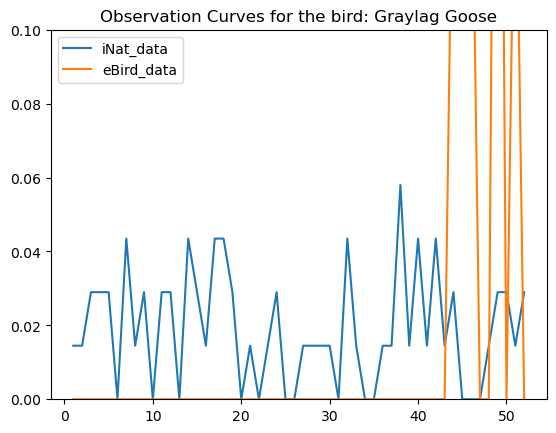

In [250]:
make_discrete_curves("4AED44E8")

In [142]:
import scipy

In [143]:
iNat_curves_discrete.loc["89431E9F", :]

WEEK
1     0.014111
2     0.016018
3     0.011442
4     0.009153
5     0.019451
6     0.028223
7     0.012967
8     0.015637
9     0.017162
10    0.016400
11    0.022502
12    0.015637
13    0.025934
14    0.024409
15    0.019451
16    0.018307
17    0.039664
18    0.031655
19    0.023265
20    0.024027
21    0.022121
22    0.022502
23    0.016018
24    0.026697
25    0.024027
26    0.027841
27    0.022883
28    0.033562
29    0.024027
30    0.025934
31    0.014493
32    0.019832
33    0.020976
34    0.016400
35    0.019451
36    0.019832
37    0.014493
38    0.014493
39    0.018688
40    0.012586
41    0.019069
42    0.015256
43    0.016018
44    0.013730
45    0.013349
46    0.012204
47    0.011060
48    0.011060
49    0.011442
50    0.017162
51    0.019069
52    0.018307
Name: 89431E9F, dtype: float64

In [156]:
! pip install --upgrade scipy

In [144]:
scipy.ndimage.gaussian_filter(
    iNat_curves_discrete.loc["89431E9F", :],
    3
)

array([0.01459028, 0.01480683, 0.01521079, 0.01574277, 0.01632253,
       0.01687755, 0.01737889, 0.0178556 , 0.0183765 , 0.01901049,
       0.01979461, 0.02072549, 0.02176446, 0.02284367, 0.02386416,
       0.02470078, 0.02522813, 0.0253724 , 0.02515773, 0.02471623,
       0.02424348, 0.02392421, 0.02386114, 0.0240398 , 0.02434048,
       0.02458548, 0.02460396, 0.0242888 , 0.02363033, 0.02271115,
       0.02166833, 0.0206363 , 0.01970398, 0.01890202, 0.01821969,
       0.01763399, 0.01712806, 0.01669239, 0.01631168, 0.01595668,
       0.01558811, 0.01517547, 0.0147174 , 0.01425584, 0.01387129,
       0.01366111, 0.01370365, 0.01402178, 0.01456108, 0.01519374,
       0.01575138, 0.01607729])

In [145]:
scipy.__version__

'1.11.3'

In [146]:
def function_smoothing(x, sigma=3):
    y = scipy.ndimage.gaussian_filter(
        x,
        sigma
    )
    return y


In [147]:
def make_smooth_curves(x, sigma=3):
    aviID = x
    plt.ylim((0,0.1))
    y1_smoothed = function_smoothing(
        iNat_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    plt.plot(y1_smoothed, label='iNat_data')
    plt.plot(y2_smoothed, label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

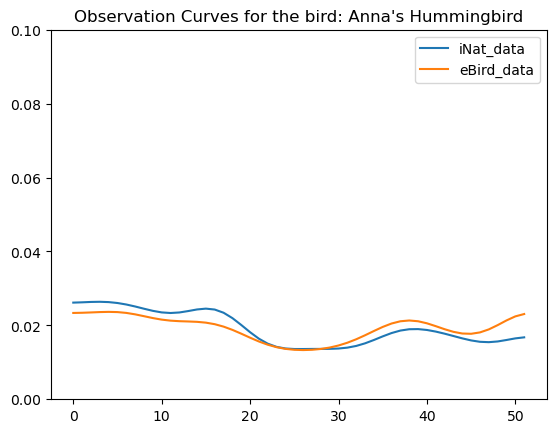

In [148]:
make_smooth_curves("42393721", sigma=3)

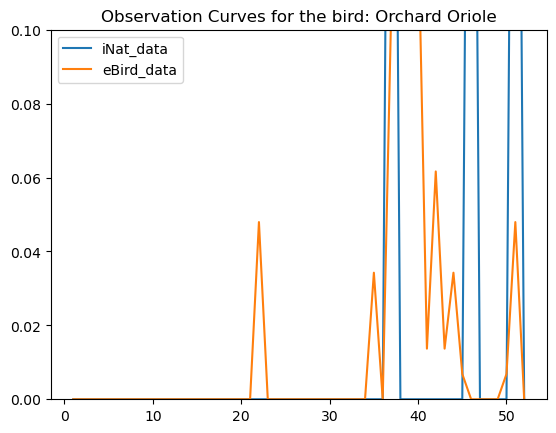

In [149]:
make_discrete_curves("000482C9")

In [150]:
y1 = iNat_curves_discrete.loc["89431E9F", :]

In [151]:
y1[15:20]

WEEK
16    0.018307
17    0.039664
18    0.031655
19    0.023265
20    0.024027
Name: 89431E9F, dtype: float64

In [152]:
y1.values.copy()

array([0.01411137, 0.01601831, 0.01144165, 0.00915332, 0.0194508 ,
       0.02822273, 0.0129672 , 0.01563692, 0.01716247, 0.01639969,
       0.02250191, 0.01563692, 0.0259344 , 0.02440885, 0.0194508 ,
       0.01830664, 0.03966438, 0.03165523, 0.02326468, 0.02402746,
       0.02212052, 0.02250191, 0.01601831, 0.02669718, 0.02402746,
       0.02784134, 0.0228833 , 0.03356217, 0.02402746, 0.0259344 ,
       0.01449275, 0.01983219, 0.02097635, 0.01639969, 0.0194508 ,
       0.01983219, 0.01449275, 0.01449275, 0.01868802, 0.01258581,
       0.01906941, 0.01525553, 0.01601831, 0.01372998, 0.01334859,
       0.01220442, 0.01106026, 0.01106026, 0.01144165, 0.01716247,
       0.01906941, 0.01830664])

In [153]:
import numpy as np

In [155]:
def make_smooth_curves_rm2wk_iNat(x, sigma=3):
    aviID = x
    plt.ylim((0,0.03))
    y1 = iNat_curves_discrete.loc[aviID, :].values.copy()
    y1[16:18] = np.mean(y1[13:21])
    y1_smoothed = function_smoothing(
        y1,
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    plt.plot(y1_smoothed, label='iNat_data')
    plt.plot(y2_smoothed, label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

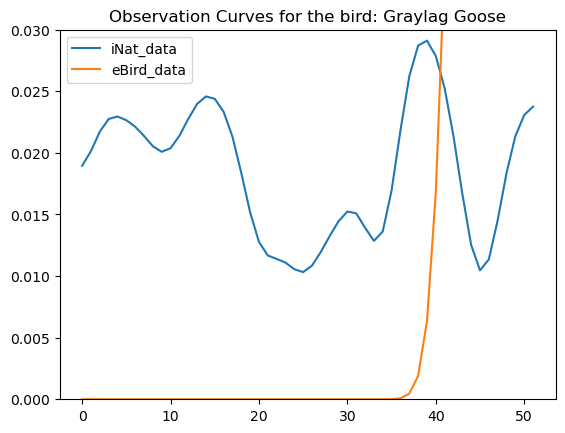

In [156]:
make_smooth_curves_rm2wk_iNat("4AED44E8", sigma=2)

In [157]:
eBird_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013699,0.034247,0.006849,0.000000,0.000000,0.000000,0.000000,0.006849,0.047945,0.000000
00124D98,0.016357,0.014596,0.015360,0.015912,0.019513,0.022939,0.029908,0.022310,0.019813,0.020955,...,0.011469,0.011595,0.011711,0.012718,0.011508,0.009737,0.009882,0.024178,0.012031,0.026162
00635FF9,0.011645,0.016302,0.010570,0.013436,0.010928,0.020064,0.019706,0.012899,0.014690,0.015944,...,0.013615,0.011824,0.010570,0.013436,0.008957,0.006270,0.005912,0.021856,0.007345,0.013973
01060BFD,0.025568,0.017070,0.021543,0.015729,0.014163,0.018710,0.013492,0.013567,0.009616,0.010585,...,0.019009,0.017294,0.016027,0.019530,0.017667,0.011405,0.010809,0.026165,0.013791,0.033023
018B3169,0.053792,0.049086,0.055003,0.047472,0.037386,0.039268,0.040613,0.044648,0.032948,0.031737,...,0.011700,0.015062,0.037924,0.029451,0.044917,0.028779,0.031872,0.067913,0.040075,0.089295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.029371,0.026586,0.026520,0.027514,0.025990,0.033017,0.031691,0.027979,0.021282,0.024133,...,0.014785,0.013127,0.014188,0.015580,0.018564,0.015315,0.012597,0.041305,0.018100,0.044620
FD2B0309,0.013940,0.013809,0.025907,0.023672,0.019726,0.024855,0.017754,0.020252,0.020121,0.018148,...,0.013546,0.011573,0.015255,0.018280,0.011310,0.007233,0.006049,0.009469,0.011967,0.022357
FED3756C,0.036807,0.037103,0.036068,0.050111,0.032077,0.039246,0.031412,0.026460,0.023208,0.021286,...,0.013304,0.011826,0.017147,0.026164,0.020399,0.014634,0.013599,0.038064,0.018995,0.038877


In [158]:
iNat_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
00124D98,0.016801,0.018817,0.019489,0.014113,0.024866,0.022177,0.018817,0.016129,0.022849,0.024866,...,0.010753,0.010753,0.010081,0.014785,0.014113,0.010753,0.012097,0.012097,0.016129,0.016129
00635FF9,0.016667,0.005556,0.000000,0.038889,0.016667,0.027778,0.022222,0.011111,0.016667,0.016667,...,0.011111,0.005556,0.044444,0.022222,0.016667,0.005556,0.022222,0.011111,0.011111,0.005556
01060BFD,0.008247,0.020619,0.008247,0.010309,0.006186,0.002062,0.008247,0.006186,0.004124,0.000000,...,0.010309,0.010309,0.016495,0.010309,0.012371,0.012371,0.010309,0.008247,0.012371,0.018557
018B3169,0.052083,0.083333,0.078125,0.010417,0.026042,0.036458,0.031250,0.041667,0.062500,0.015625,...,0.005208,0.010417,0.020833,0.020833,0.041667,0.015625,0.078125,0.057292,0.036458,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.016158,0.021544,0.021544,0.017056,0.020646,0.031418,0.023339,0.025135,0.015260,0.019749,...,0.013465,0.008977,0.014363,0.017056,0.013465,0.008977,0.017953,0.008079,0.020646,0.019749
FD2B0309,0.020588,0.005882,0.011765,0.029412,0.017647,0.014706,0.014706,0.023529,0.035294,0.044118,...,0.041176,0.008824,0.014706,0.002941,0.017647,0.011765,0.002941,0.005882,0.023529,0.032353
FED3756C,0.040698,0.020349,0.040698,0.046512,0.027616,0.042151,0.031977,0.034884,0.023256,0.023256,...,0.018895,0.007267,0.023256,0.017442,0.024709,0.013081,0.017442,0.027616,0.036337,0.020349


In [159]:
eBird_weekly_counts2['COUNTS'].sum()

5228172

In [161]:
freq_ebird_birds = eBird_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/52281.72

In [162]:
iNat_weekly_counts2['COUNTS'].sum()

140807

In [163]:
freq_inat_birds = iNat_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/1408.07

In [164]:
freq_ebird_birds.sort_values()

AVIBASEID
95DB0943    0.000019
169B483C    0.000038
4BFE8C78    0.000038
093AC1FC    0.000038
D4540F88    0.000038
              ...   
36B3872D    2.431634
151C2B3F    2.651673
B182DED2    2.787322
89431E9F    3.019468
42393721    3.069658
Name: COUNTS, Length: 387, dtype: float64

In [165]:
name_avID_dict["B182DED2"]

'Black Phoebe'

In [166]:
a = freq_inat_birds.sort_values()[freq_inat_birds.sort_values() < 0.005].keys()

In [167]:
b = freq_ebird_birds.sort_values()[freq_ebird_birds.sort_values() < 0.005].keys()

In [168]:
remove_birds = set(list(a) + list(b))

In [169]:
all_birds = set(eBird_curves_discrete.index)

In [170]:
all_birds_min_meet =all_birds.difference(remove_birds)

In [171]:
len(all_birds), len(remove_birds), len(all_birds_min_meet)

(387, 97, 290)

In [172]:
list(remove_birds)[0:10]

['F9E37510',
 '56036504',
 'B5565AD8',
 '4D08EE7E',
 'E16B2C03',
 'C757BD95',
 'ECDE73F2',
 '3A3C62BC',
 '043F337A',
 '42101632']

In [174]:
#make_discrete_curves("11512CF4")

In [175]:
eBird_curves_discrete2 = eBird_curves_discrete[eBird_curves_discrete.index.isin(all_birds_min_meet)].copy()

In [176]:
iNat_curves_discrete2 = iNat_curves_discrete[iNat_curves_discrete.index.isin(all_birds_min_meet)].copy()

In [177]:
eBird_curves_discrete2

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
00124D98,0.016357,0.014596,0.015360,0.015912,0.019513,0.022939,0.029908,0.022310,0.019813,0.020955,...,0.011469,0.011595,0.011711,0.012718,0.011508,0.009737,0.009882,0.024178,0.012031,0.026162
00635FF9,0.011645,0.016302,0.010570,0.013436,0.010928,0.020064,0.019706,0.012899,0.014690,0.015944,...,0.013615,0.011824,0.010570,0.013436,0.008957,0.006270,0.005912,0.021856,0.007345,0.013973
01060BFD,0.025568,0.017070,0.021543,0.015729,0.014163,0.018710,0.013492,0.013567,0.009616,0.010585,...,0.019009,0.017294,0.016027,0.019530,0.017667,0.011405,0.010809,0.026165,0.013791,0.033023
018B3169,0.053792,0.049086,0.055003,0.047472,0.037386,0.039268,0.040613,0.044648,0.032948,0.031737,...,0.011700,0.015062,0.037924,0.029451,0.044917,0.028779,0.031872,0.067913,0.040075,0.089295
029491CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005650,0.002825,0.011299,...,0.008475,0.014124,0.005650,0.002825,0.000000,0.000000,0.000000,0.008475,0.005650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.029371,0.026586,0.026520,0.027514,0.025990,0.033017,0.031691,0.027979,0.021282,0.024133,...,0.014785,0.013127,0.014188,0.015580,0.018564,0.015315,0.012597,0.041305,0.018100,0.044620
FD2B0309,0.013940,0.013809,0.025907,0.023672,0.019726,0.024855,0.017754,0.020252,0.020121,0.018148,...,0.013546,0.011573,0.015255,0.018280,0.011310,0.007233,0.006049,0.009469,0.011967,0.022357
FED3756C,0.036807,0.037103,0.036068,0.050111,0.032077,0.039246,0.031412,0.026460,0.023208,0.021286,...,0.013304,0.011826,0.017147,0.026164,0.020399,0.014634,0.013599,0.038064,0.018995,0.038877


In [178]:
iNat_curves_discrete2

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
00124D98,0.016801,0.018817,0.019489,0.014113,0.024866,0.022177,0.018817,0.016129,0.022849,0.024866,...,0.010753,0.010753,0.010081,0.014785,0.014113,0.010753,0.012097,0.012097,0.016129,0.016129
00635FF9,0.016667,0.005556,0.000000,0.038889,0.016667,0.027778,0.022222,0.011111,0.016667,0.016667,...,0.011111,0.005556,0.044444,0.022222,0.016667,0.005556,0.022222,0.011111,0.011111,0.005556
01060BFD,0.008247,0.020619,0.008247,0.010309,0.006186,0.002062,0.008247,0.006186,0.004124,0.000000,...,0.010309,0.010309,0.016495,0.010309,0.012371,0.012371,0.010309,0.008247,0.012371,0.018557
018B3169,0.052083,0.083333,0.078125,0.010417,0.026042,0.036458,0.031250,0.041667,0.062500,0.015625,...,0.005208,0.010417,0.020833,0.020833,0.041667,0.015625,0.078125,0.057292,0.036458,0.083333
029491CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.016158,0.021544,0.021544,0.017056,0.020646,0.031418,0.023339,0.025135,0.015260,0.019749,...,0.013465,0.008977,0.014363,0.017056,0.013465,0.008977,0.017953,0.008079,0.020646,0.019749
FD2B0309,0.020588,0.005882,0.011765,0.029412,0.017647,0.014706,0.014706,0.023529,0.035294,0.044118,...,0.041176,0.008824,0.014706,0.002941,0.017647,0.011765,0.002941,0.005882,0.023529,0.032353
FED3756C,0.040698,0.020349,0.040698,0.046512,0.027616,0.042151,0.031977,0.034884,0.023256,0.023256,...,0.018895,0.007267,0.023256,0.017442,0.024709,0.013081,0.017442,0.027616,0.036337,0.020349


In [179]:
eBird_curves_discrete2_val = eBird_curves_discrete2.values
iNat_curves_discrete2_val = iNat_curves_discrete2.values

In [180]:
eBird_curves_discrete2_val.shape

(290, 52)

In [181]:
iNat_curves_discrete2_val_smoothed = iNat_curves_discrete2_val.copy()

In [182]:
for rn in range(290):
    iNat_curves_discrete2_val_smoothed[rn, 16:18] = \
        np.mean(iNat_curves_discrete2_val_smoothed[rn, 13:21])


In [183]:
avg_iNat_curve = np.mean(iNat_curves_discrete2_val_smoothed, axis=0)

In [184]:
avg_iNat_curve.shape

(52,)

In [185]:
avg_eBird_curve = np.mean(eBird_curves_discrete2_val, axis=0)

In [186]:
avg_eBird_curve.shape

(52,)

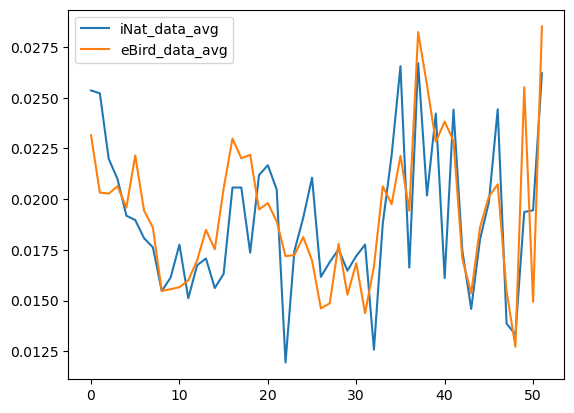

In [187]:
plt.plot(avg_iNat_curve, label='iNat_data_avg')
plt.plot(avg_eBird_curve, label='eBird_data_avg')
plt.legend()

In [188]:
avg_iNat_curve = avg_iNat_curve*(1/0.9792)

In [189]:
sum(avg_iNat_curve)

1.0067397644733056

In [190]:
sum(avg_eBird_curve)

0.9999999999999997

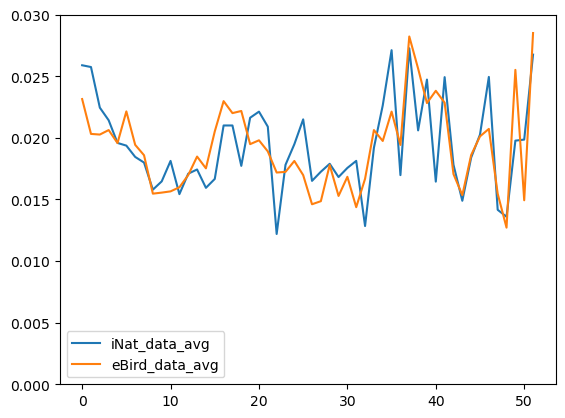

In [191]:
plt.ylim((0,0.03))
plt.plot(function_smoothing(avg_iNat_curve, sigma=0.1), label='iNat_data_avg')
plt.plot(function_smoothing(avg_eBird_curve, sigma=0.1), label='eBird_data_avg')
plt.legend()

In [192]:
from scipy.special import kl_div

In [193]:
(kl_div(avg_iNat_curve, avg_eBird_curve)).sum()

0.010506569898747853

In [194]:
numbering_birds = list(eBird_curves_discrete2.index)

In [195]:
numbering_birds.index("FFF61080")

289

In [196]:
def rm_make_discrete_curves(x):
    aviID = x
    plt.ylim((0,0.1))
    idx = numbering_birds.index(aviID)
    plt.plot(iNat_curves_discrete2_val_smoothed[idx, :], label='iNat_data')
    plt.plot(eBird_curves_discrete2_val[idx, :], label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[aviID]}")

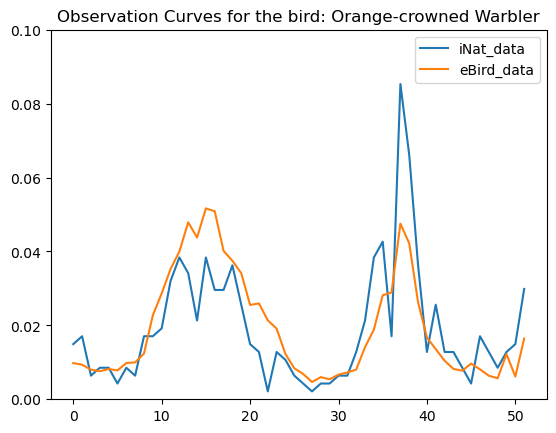

In [197]:
rm_make_discrete_curves("FFF61080")

In [198]:
def rm_make_smooth_curves(x, sigma=(3,3)):
    aviID = x
    plt.ylim((0,0.1))
    idx = numbering_birds.index(aviID)
    y1_smoothed = function_smoothing(
        iNat_curves_discrete2_val_smoothed[idx, :],
        sigma=sigma[0]
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete2_val[idx, :],
        sigma=sigma[1]
    )
    plt.plot(y1_smoothed, label='iNat_data')
    plt.plot(y2_smoothed, label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

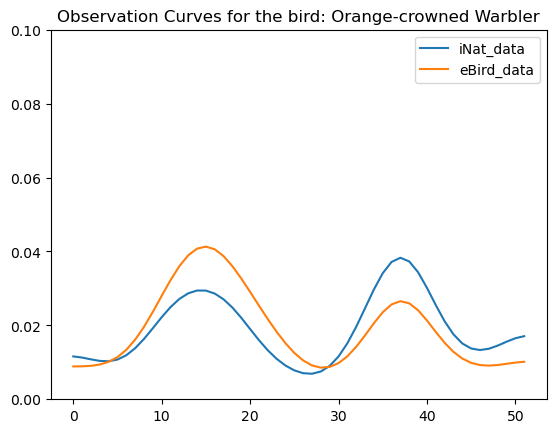

In [199]:
rm_make_smooth_curves("FFF61080")

In [200]:
kl_div_birds_discrete = [ np.mean(kl_div(iNat_curves_discrete2_val_smoothed[i, :], eBird_curves_discrete2_val[i,:])) for i in range(277)]

In [201]:
kl_div_birds_discrete

[0.0008127483049420456,
 0.005601989621260989,
 0.0029591694552537576,
 0.0031118376647253383,
 inf,
 0.01000484353696354,
 0.004933563684954767,
 0.002087935390129501,
 0.019425694805837702,
 0.0020937451539483707,
 0.005500906960174355,
 0.0020775816291970645,
 0.036496197424313745,
 0.0017974350096672863,
 0.025582032430866597,
 inf,
 0.0020407191965243206,
 0.002335131843772182,
 0.015825890083569275,
 0.02161794321643752,
 0.007566808640082481,
 0.012896499492691553,
 0.02008414211981459,
 0.010949598999686031,
 0.006023395869598842,
 0.012672349837026186,
 0.03473667654512434,
 0.0004979077270904749,
 0.003992661103369178,
 0.0156981078086135,
 0.0049348934068980145,
 0.016222409103101784,
 0.027056693699693372,
 0.023028870684763707,
 0.02190929640245841,
 0.003653760125226361,
 0.0017118772707378574,
 0.02214403845058932,
 0.002459676473492447,
 0.006341747834131327,
 0.012721788110985439,
 0.0013225591219018426,
 0.0032451191639157693,
 0.0015167375591638595,
 0.00080572760602

In [202]:
df_kl_div_discrete = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_discrete)))

In [203]:
df_kl_div_discrete.columns = ['AVIBASEID', 'KL_Divergence_Value']

In [204]:
df_kl_div_discrete['COMMON NAME'] = df_kl_div_discrete['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [205]:
df_kl_div_discrete.sort_values(by='KL_Divergence_Value')

,AVIBASEID,KL_Divergence_Value,COMMON NAME
163,88F4B969,0.000000,Willow Warbler
73,36B3872D,0.000412,Turkey Vulture
197,AA7901D8,0.000425,Snowy Egret
89,49D9148A,0.000474,Great Egret
85,42393721,0.000477,Anna's Hummingbird
...,...,...,...
171,90B13ACF,inf,Rough-legged Hawk
248,D621FFC6,inf,Common Poorwill
149,7E65A952,inf,Bullock's Oriole
230,BD61BDEC,inf,Golden-crowned Sparrow


In [206]:
def generate_kl_smooth(sigma=(3,3)):
    all_kl = []
    for i in range(277):
        x_smooth = scipy.ndimage.gaussian_filter(
            iNat_curves_discrete2_val_smoothed[i, :],
            sigma=sigma[0]
        )
        y_smooth = scipy.ndimage.gaussian_filter(
            eBird_curves_discrete2_val[i,:],
            sigma=sigma[1]
        )
        kl_div_val = np.mean(kl_div(x_smooth, y_smooth))
        all_kl.append(kl_div_val)
    return all_kl
    

In [207]:
kl_div_birds_smooth = generate_kl_smooth(sigma=(2,2))

In [208]:
kl_div_birds_smooth

[0.00015081546298529311,
 0.0010887003257821523,
 0.0010562644776631184,
 0.00043384290374897,
 0.002261330203316795,
 0.0049557867954176105,
 0.0006258379289244744,
 0.0004977754030355203,
 0.005778674091383996,
 0.00040328916498746616,
 0.0008083308927164733,
 0.00039810981260853255,
 0.006735603544443625,
 0.0002968345342176772,
 0.007554922788772386,
 0.0012251155401788887,
 0.00046134028533428774,
 0.0007399450468748765,
 0.008127334753748904,
 0.003685722214816162,
 0.0023166291688032034,
 0.002023007159318133,
 0.006185104629623082,
 0.0014780553021213204,
 0.0020513984408987657,
 0.0014101464550075578,
 0.010149963345213696,
 0.0001352326009505228,
 0.00020326111109842217,
 0.0031690127057870114,
 0.0006132244861903484,
 0.00675258689658868,
 0.010774952754606019,
 0.004977521298998384,
 0.0065837522626951955,
 0.00045508781017024276,
 0.0003238365546371505,
 0.0037350592833434062,
 0.0007755606767750766,
 0.0009855167643612651,
 0.003951667936867381,
 0.0002909629071040895,
 0

In [209]:
df_kl_div_smooth = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_smooth)))

In [210]:
df_kl_div_smooth.columns = ['AVIBASEID', 'KL_Divergence_Value']

In [211]:
df_kl_div_smooth['COMMON NAME'] = df_kl_div_smooth['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [212]:
df_kl_div_smooth.sort_values(by='KL_Divergence_Value')

,AVIBASEID,KL_Divergence_Value,COMMON NAME
163,88F4B969,0.000000,Willow Warbler
122,6658BAC5,0.000066,Oriental Turtle-Dove
197,AA7901D8,0.000070,Snowy Egret
73,36B3872D,0.000077,Turkey Vulture
234,C235A4D7,0.000088,Gadwall
...,...,...,...
237,C5971E25,inf,Rock Sandpiper
260,E6F3BA54,inf,Red-necked Phalarope
93,4BB4F257,inf,Black-chinned Hummingbird
171,90B13ACF,inf,Rough-legged Hawk


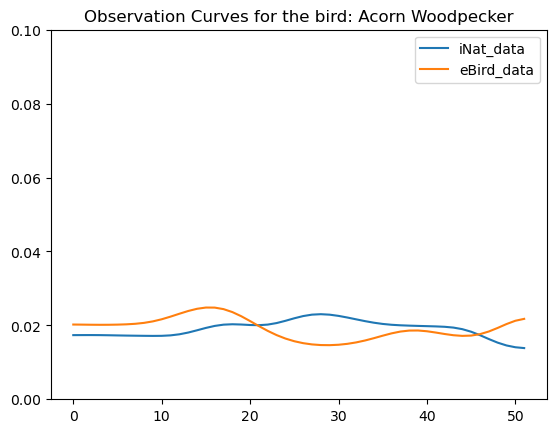

In [213]:
rm_make_smooth_curves("7E327303", sigma=(3,3))

In [214]:
df_kl_div_all = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_smooth, kl_div_birds_discrete)))

In [215]:
df_kl_div_all.columns = ['AVIBASEID', 'KL_DIV_SMOOTH', 'KL_DIV_DISCRETE']

In [216]:
df_kl_div_all['COMMON NAME'] = df_kl_div_all['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [217]:
df_kl_div_all

,AVIBASEID,KL_DIV_SMOOTH,KL_DIV_DISCRETE,COMMON NAME
0,00124D98,0.000151,0.000813,Mourning Dove
1,00635FF9,0.001089,0.005602,Pileated Woodpecker
2,01060BFD,0.001056,0.002959,Western Sandpiper
3,018B3169,0.000434,0.003112,Horned Grebe
4,029491CD,0.002261,inf,Gray-crowned Rosy-Finch
...,...,...,...,...
272,F3DA111C,0.001115,0.003457,Merlin
273,F59AB6B3,0.000852,0.001787,Brown Pelican
274,F5C181CA,inf,inf,Cliff Swallow
275,F5C8516D,0.000879,0.003431,Wilson's Snipe


In [218]:
np.sum(df_kl_div_smooth.sort_values(by='KL_Divergence_Value').values[:,1] == np.inf)

7

In [219]:
np.sum(df_kl_div_discrete.sort_values(by='KL_Divergence_Value').values[:,1] == np.inf)

31

In [223]:
kl_div_birds_discrete = [ np.mean(kl_div(iNat_curves_discrete2_val_smoothed[i, :], eBird_curves_discrete2_val[i,:])) for i in range(290)]

In [224]:
kl_div_birds_discrete

[0.0008127483049420456,
 0.005601989621260989,
 0.0029591694552537576,
 0.0031118376647253383,
 inf,
 0.01000484353696354,
 0.004933563684954767,
 0.002087935390129501,
 0.019425694805837702,
 0.0020937451539483707,
 0.005500906960174355,
 0.0020775816291970645,
 0.036496197424313745,
 0.0017974350096672863,
 0.025582032430866597,
 inf,
 0.0020407191965243206,
 0.002335131843772182,
 0.015825890083569275,
 0.02161794321643752,
 0.007566808640082481,
 0.012896499492691553,
 0.02008414211981459,
 0.010949598999686031,
 0.006023395869598842,
 0.012672349837026186,
 0.03473667654512434,
 0.0004979077270904749,
 0.003992661103369178,
 0.0156981078086135,
 0.0049348934068980145,
 0.016222409103101784,
 0.027056693699693372,
 0.023028870684763707,
 0.02190929640245841,
 0.003653760125226361,
 0.0017118772707378574,
 0.02214403845058932,
 0.002459676473492447,
 0.006341747834131327,
 0.012721788110985439,
 0.0013225591219018426,
 0.0032451191639157693,
 0.0015167375591638595,
 0.00080572760602

In [225]:
df_kl_div_discrete = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_discrete)))

In [226]:
df_kl_div_discrete.columns = ['AVIBASEID', 'KL_Divergence_Value']

In [227]:
df_kl_div_discrete['COMMON NAME'] = df_kl_div_discrete['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [228]:
df_kl_div_discrete.sort_values(by='KL_Divergence_Value')

,AVIBASEID,KL_Divergence_Value,COMMON NAME
163,88F4B969,0.000000,Willow Warbler
73,36B3872D,0.000412,Turkey Vulture
197,AA7901D8,0.000425,Snowy Egret
89,49D9148A,0.000474,Great Egret
85,42393721,0.000477,Anna's Hummingbird
...,...,...,...
260,E6F3BA54,inf,Red-necked Phalarope
259,E53FC25C,inf,Swainson's Thrush
258,E4A5B66A,inf,Sooty Grouse
93,4BB4F257,inf,Black-chinned Hummingbird


In [229]:
def generate_kl_smooth(sigma=(3,3)):
    all_kl = []
    for i in range(277):
        x_smooth = scipy.ndimage.gaussian_filter(
            iNat_curves_discrete2_val_smoothed[i, :],
            sigma=sigma[0]
        )
        y_smooth = scipy.ndimage.gaussian_filter(
            eBird_curves_discrete2_val[i,:],
            sigma=sigma[1]
        )
        kl_div_val = np.mean(kl_div(x_smooth, y_smooth))
        all_kl.append(kl_div_val)
    return all_kl
    

In [230]:
kl_div_birds_smooth = generate_kl_smooth(sigma=(2,2))

In [231]:
kl_div_birds_smooth

[0.00015081546298529311,
 0.0010887003257821523,
 0.0010562644776631184,
 0.00043384290374897,
 0.002261330203316795,
 0.0049557867954176105,
 0.0006258379289244744,
 0.0004977754030355203,
 0.005778674091383996,
 0.00040328916498746616,
 0.0008083308927164733,
 0.00039810981260853255,
 0.006735603544443625,
 0.0002968345342176772,
 0.007554922788772386,
 0.0012251155401788887,
 0.00046134028533428774,
 0.0007399450468748765,
 0.008127334753748904,
 0.003685722214816162,
 0.0023166291688032034,
 0.002023007159318133,
 0.006185104629623082,
 0.0014780553021213204,
 0.0020513984408987657,
 0.0014101464550075578,
 0.010149963345213696,
 0.0001352326009505228,
 0.00020326111109842217,
 0.0031690127057870114,
 0.0006132244861903484,
 0.00675258689658868,
 0.010774952754606019,
 0.004977521298998384,
 0.0065837522626951955,
 0.00045508781017024276,
 0.0003238365546371505,
 0.0037350592833434062,
 0.0007755606767750766,
 0.0009855167643612651,
 0.003951667936867381,
 0.0002909629071040895,
 0

In [232]:
df_kl_div_smooth = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_smooth)))

In [233]:
df_kl_div_smooth.columns = ['AVIBASEID', 'KL_Divergence_Value']

In [234]:
df_kl_div_smooth['COMMON NAME'] = df_kl_div_smooth['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [235]:
df_kl_div_smooth.sort_values(by='KL_Divergence_Value')

,AVIBASEID,KL_Divergence_Value,COMMON NAME
163,88F4B969,0.000000,Willow Warbler
122,6658BAC5,0.000066,Oriental Turtle-Dove
197,AA7901D8,0.000070,Snowy Egret
73,36B3872D,0.000077,Turkey Vulture
234,C235A4D7,0.000088,Gadwall
...,...,...,...
237,C5971E25,inf,Rock Sandpiper
260,E6F3BA54,inf,Red-necked Phalarope
93,4BB4F257,inf,Black-chinned Hummingbird
171,90B13ACF,inf,Rough-legged Hawk


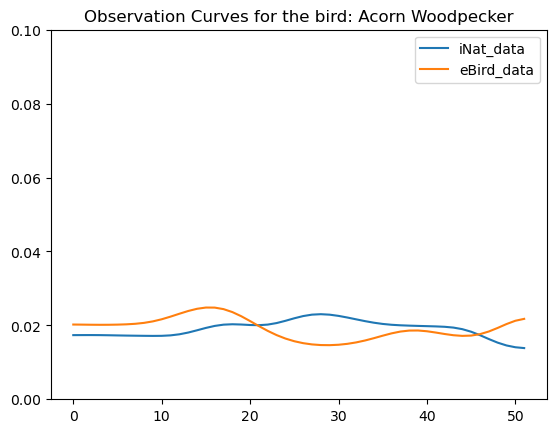

In [236]:
rm_make_smooth_curves("7E327303", sigma=(3,3))

In [237]:
df_kl_div_all = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_smooth, kl_div_birds_discrete)))

In [238]:
df_kl_div_all.columns = ['AVIBASEID', 'KL_DIV_SMOOTH', 'KL_DIV_DISCRETE']

In [239]:
df_kl_div_all['COMMON NAME'] = df_kl_div_all['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [240]:
df_kl_div_all

,AVIBASEID,KL_DIV_SMOOTH,KL_DIV_DISCRETE,COMMON NAME
0,00124D98,0.000151,0.000813,Mourning Dove
1,00635FF9,0.001089,0.005602,Pileated Woodpecker
2,01060BFD,0.001056,0.002959,Western Sandpiper
3,018B3169,0.000434,0.003112,Horned Grebe
4,029491CD,0.002261,inf,Gray-crowned Rosy-Finch
...,...,...,...,...
272,F3DA111C,0.001115,0.003457,Merlin
273,F59AB6B3,0.000852,0.001787,Brown Pelican
274,F5C181CA,inf,inf,Cliff Swallow
275,F5C8516D,0.000879,0.003431,Wilson's Snipe


In [241]:
np.sum(df_kl_div_smooth.sort_values(by='KL_Divergence_Value').values[:,1] == np.inf)

7

In [242]:
np.sum(df_kl_div_discrete.sort_values(by='KL_Divergence_Value').values[:,1] == np.inf)

33

# Plots

In [175]:
import seaborn as sns

df_ebird5, inat8

In [183]:
eda_inat1= df_iNat8.groupby('COMMON NAME').count()['taxonID']/716.02

In [186]:
eda_inat1.sort_values(ascending=False)

COMMON NAME
Red-tailed Hawk               3.273652
Anna's Hummingbird            2.698249
Mallard                       2.553001
White-crowned Sparrow         2.150778
Great Egret                   2.147985
                                ...   
Sulphur-bellied Flycatcher    0.001397
Prairie Warbler               0.001397
Flesh-footed Shearwater       0.001397
Eastern Phoebe                0.001397
Yellow-throated Vireo         0.001397
Name: taxonID, Length: 352, dtype: float64

In [191]:
eda_ebird = df_eBird5.groupby('COMMON NAME').count()['AVIBASEID']

In [192]:
eda_ebird = eda_ebird/38423.32

In [193]:
eda_ebird.sort_values(ascending=False)

COMMON NAME
Black Phoebe            2.874973
Anna's Hummingbird      2.736723
House Finch             2.557692
California Scrub-Jay    2.544080
Turkey Vulture          2.421889
                          ...   
Glossy Ibis             0.000104
Helmeted Guineafowl     0.000104
Neotropic Cormorant     0.000078
Indian Peafowl          0.000052
Graylag Goose           0.000026
Name: AVIBASEID, Length: 352, dtype: float64

In [196]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [198]:
import matplotlib.pyplot as plt

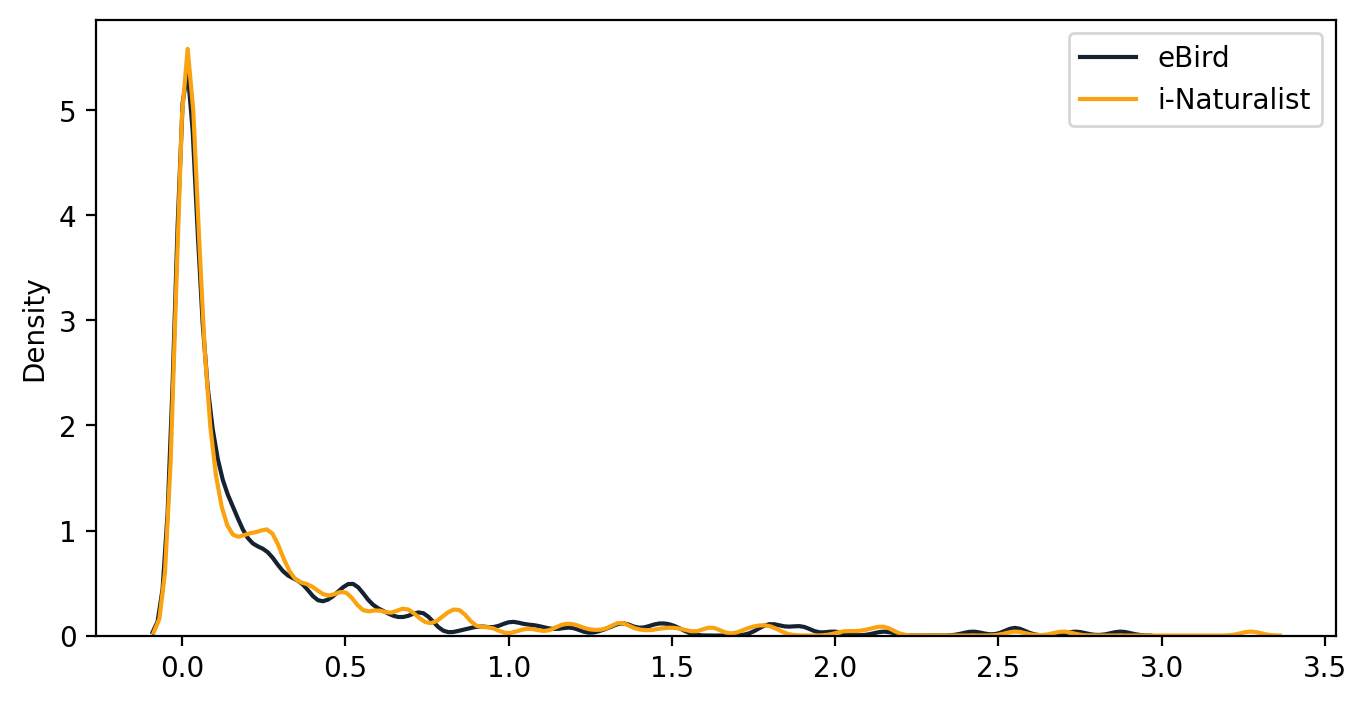

In [216]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.kdeplot(eda_ebird.values, ax=ax, label='eBird', color='#142231', bw_adjust=0.2)
sns.kdeplot(eda_inat1.values, ax=ax, label='i-Naturalist', color='#FBA210', bw_adjust=0.2)
ax.legend()


In [222]:
eda_diff = eda_ebird.sort_index() - eda_inat1.sort_index()

In [224]:
eda_diff.describe()

count    3.520000e+02
mean    -1.009294e-17
std      2.587908e-01
min     -1.470059e+00
25%     -3.255552e-02
50%     -1.088524e-03
75%      3.080370e-02
max      1.195224e+00
dtype: float64

In [226]:
import numpy as np

In [228]:
eda_diff_abs = np.abs(eda_diff)

In [229]:
eda_diff_abs.sort_values(ascending=False)

COMMON NAME
Red-tailed Hawk             1.470059
Wild Turkey                 1.396315
Neotropic Cormorant         1.342063
American Coot               1.272878
European Starling           1.195224
                              ...   
Rough-legged Hawk           0.000107
Great Crested Flycatcher    0.000087
Swamp Sparrow               0.000086
Least Flycatcher            0.000069
Blue Jay                    0.000009
Length: 352, dtype: float64

In [231]:
eda_diff.sort_values()

COMMON NAME
Red-tailed Hawk       -1.470059
Wild Turkey           -1.396315
Neotropic Cormorant   -1.342063
American Coot         -1.272878
Great Blue Heron      -1.020892
                         ...   
Turkey Vulture         0.799029
Mourning Dove          0.963545
Common Raven           0.994793
House Finch            1.060527
European Starling      1.195224
Length: 352, dtype: float64